## 1. Import packages and Load dataset

In [268]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [269]:
pip install --index-url https://test.pypi.org/simple/ --no-deps my_krml_ratana

Looking in indexes: https://test.pypi.org/simple/
Note: you may need to restart the kernel to use updated packages.


In [270]:
import pandas as pd
import numpy as np
from my_krml_ratana.data.sets import df_report

In [271]:
df = pd.read_csv('../../data/interim/df_master.csv')

In [272]:
df

cc_num gender              city state    zip      lat  \
0          4218196001337      M            Ambler    PA  19002  40.1809   
1          4218196001337      M            Ambler    PA  19002  40.1809   
2          4218196001337      M            Ambler    PA  19002  40.1809   
3          4218196001337      M            Ambler    PA  19002  40.1809   
4          4218196001337      M            Ambler    PA  19002  40.1809   
...                  ...    ...               ...   ...    ...      ...   
4260899  343251790447085      M  Saint Petersburg    FL  33710  27.7898   
4260900  343251790447085      M  Saint Petersburg    FL  33710  27.7898   
4260901  343251790447085      M  Saint Petersburg    FL  33710  27.7898   
4260902  343251790447085      M  Saint Petersburg    FL  33710  27.7898   
4260903  343251790447085      M  Saint Petersburg    FL  33710  27.7898   

            long  city_pop      acct_num job_category  age  \
0       -75.2156     32412  888022315787      Finance   65   
1       -75.2156     32412  888022315787      Finance   65   
2       -75.2156     32412  888022315787      Finance   65   
3       -75.2156     32412  888022315787      Finance   65   
4       -75.2156     32412  888022315787      Finance   65   
...          ...       ...           ...          ...  ...   
4260899 -82.7243    341043  298026601683  Engineering   82   
4260900 -82.7243    341043  298026601683  Engineering   82   
4260901 -82.7243    341043  298026601683  Engineering   82   
4260902 -82.7243    341043  298026601683  Engineering   82   
4260903 -82.7243    341043  298026601683  Engineering   82   

                                trans_num        category    amt  is_fraud  \
0        91ab12e73ef38206e1121e9648d2408d   gas_transport  69.12         0   
1        071553d533a6822a4431c354c434ddcb     grocery_pos  68.11         0   
2        0cfad38ef15e4749eff68dc83f62c151        misc_net  40.35         0   
3        5782693d7c70f062f258cb30bfa8900f     grocery_pos  96.22         0   
4        35fd7db657d7e30dd608c37f7798186e   gas_transport  71.89         0   
...                                   ...             ...    ...       ...   
4260899  4eafc5b16da625c3436f2484d8dcabcb  health_fitness   7.47         0   
4260900  041b18f68b893b68e7aa29c16a08a08d     food_dining   2.30         0   
4260901  a26df5348dfee4839f0fa00155e2ed1c  health_fitness   5.82         0   
4260902  e388fc8055b1426c62640baaae10108f  health_fitness   9.16         0   
4260903  ed07c01568cceb91b94d7572d3dd5e0e   personal_care   8.29         0   

                          merchant  merch_lat  merch_long            timestamp  
0                   Phillips Group  39.491416  -75.588522  2019-05-24 17:39:10  
1                       Tucker Ltd  40.890319  -75.573359  2019-09-25 15:31:59  
2                        Dixon PLC  39.244958  -74.475327  2019-12-24 16:40:01  
3                   Lambert-Cooper  39.656925  -75.802342  2019-10-18 19:50:38  
4                     Griffith LLC  40.313342  -74.220434  2019-02-10 23:13:20  
...                            ...        ...         ...                  ...  
4260899  Horton, Ware and Reynolds  27.707908  -82.320308  2021-07-30 09:22:23  
4260900            Hanson and Sons  27.896372  -83.387356  2021-06-28 11:38:46  
4260901                  White LLC  27.110602  -82.426821  2021-08-24 09:37:49  
4260902             Snyder-Johnson  28.110510  -81.891797  2021-08-26 11:16:35  
4260903              Ewing-Russell  27.211428  -83.514176  2022-11-24 02:04:28  

[4260904 rows x 19 columns]

## 2. Creating target variable

Since our goal is to predict monthly spending of each customer for next month we need to create a monthly spending amount (target variable)

Before building the model we need to consider if there are enough data points to create one model per customers. This is important when we decide train/test/validation split
   

In [273]:
transaction_counts = df.groupby('cc_num').size().reset_index(name='transaction_count')

In [274]:
transaction_counts

cc_num  transaction_count
0            60400268763               5101
1            60406155816               6910
2            60429276409               7631
3            60432200743               5454
4            60434956110               9476
..                   ...                ...
978  4966177182498980888               3639
979  4967150066664110652               7630
980  4968827697040953141               4384
981  4983665528993160877               5096
982  4986226992066617996               1432

[983 rows x 2 columns]

In [275]:
# Create year and month features from timestamp

df['timestamp'] = pd.to_datetime(df['timestamp'])

df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month

In [276]:
df

cc_num gender              city state    zip      lat  \
0          4218196001337      M            Ambler    PA  19002  40.1809   
1          4218196001337      M            Ambler    PA  19002  40.1809   
2          4218196001337      M            Ambler    PA  19002  40.1809   
3          4218196001337      M            Ambler    PA  19002  40.1809   
4          4218196001337      M            Ambler    PA  19002  40.1809   
...                  ...    ...               ...   ...    ...      ...   
4260899  343251790447085      M  Saint Petersburg    FL  33710  27.7898   
4260900  343251790447085      M  Saint Petersburg    FL  33710  27.7898   
4260901  343251790447085      M  Saint Petersburg    FL  33710  27.7898   
4260902  343251790447085      M  Saint Petersburg    FL  33710  27.7898   
4260903  343251790447085      M  Saint Petersburg    FL  33710  27.7898   

            long  city_pop      acct_num job_category  ...  \
0       -75.2156     32412  888022315787      Finance  ...   
1       -75.2156     32412  888022315787      Finance  ...   
2       -75.2156     32412  888022315787      Finance  ...   
3       -75.2156     32412  888022315787      Finance  ...   
4       -75.2156     32412  888022315787      Finance  ...   
...          ...       ...           ...          ...  ...   
4260899 -82.7243    341043  298026601683  Engineering  ...   
4260900 -82.7243    341043  298026601683  Engineering  ...   
4260901 -82.7243    341043  298026601683  Engineering  ...   
4260902 -82.7243    341043  298026601683  Engineering  ...   
4260903 -82.7243    341043  298026601683  Engineering  ...   

                                trans_num        category    amt  is_fraud  \
0        91ab12e73ef38206e1121e9648d2408d   gas_transport  69.12         0   
1        071553d533a6822a4431c354c434ddcb     grocery_pos  68.11         0   
2        0cfad38ef15e4749eff68dc83f62c151        misc_net  40.35         0   
3        5782693d7c70f062f258cb30bfa8900f     grocery_pos  96.22         0   
4        35fd7db657d7e30dd608c37f7798186e   gas_transport  71.89         0   
...                                   ...             ...    ...       ...   
4260899  4eafc5b16da625c3436f2484d8dcabcb  health_fitness   7.47         0   
4260900  041b18f68b893b68e7aa29c16a08a08d     food_dining   2.30         0   
4260901  a26df5348dfee4839f0fa00155e2ed1c  health_fitness   5.82         0   
4260902  e388fc8055b1426c62640baaae10108f  health_fitness   9.16         0   
4260903  ed07c01568cceb91b94d7572d3dd5e0e   personal_care   8.29         0   

                          merchant  merch_lat  merch_long           timestamp  \
0                   Phillips Group  39.491416  -75.588522 2019-05-24 17:39:10   
1                       Tucker Ltd  40.890319  -75.573359 2019-09-25 15:31:59   
2                        Dixon PLC  39.244958  -74.475327 2019-12-24 16:40:01   
3                   Lambert-Cooper  39.656925  -75.802342 2019-10-18 19:50:38   
4                     Griffith LLC  40.313342  -74.220434 2019-02-10 23:13:20   
...                            ...        ...         ...                 ...   
4260899  Horton, Ware and Reynolds  27.707908  -82.320308 2021-07-30 09:22:23   
4260900            Hanson and Sons  27.896372  -83.387356 2021-06-28 11:38:46   
4260901                  White LLC  27.110602  -82.426821 2021-08-24 09:37:49   
4260902             Snyder-Johnson  28.110510  -81.891797 2021-08-26 11:16:35   
4260903              Ewing-Russell  27.211428  -83.514176 2022-11-24 02:04:28   

         year  month  
0        2019      5  
1        2019      9  
2        2019     12  
3        2019     10  
4        2019      2  
...       ...    ...  
4260899  2021      7  
4260900  2021      6  
4260901  2021      8  
4260902  2021      8  
4260903  2022     11  

[4260904 rows x 21 columns]

In [277]:
# Number of transaction per year
transaction_counts = df.groupby(['cc_num', 'year']).size().reset_index(name='transaction_count')

In [278]:
transaction_counts.head(50)

cc_num  year  transaction_count
0    60400268763  2018                  1
1    60400268763  2019               1130
2    60400268763  2020               1110
3    60400268763  2021               1092
4    60400268763  2022               1768
5    60406155816  2018                  1
6    60406155816  2019               1446
7    60406155816  2020               1436
8    60406155816  2021               1442
9    60406155816  2022               2585
10   60429276409  2018                  3
11   60429276409  2019               1402
12   60429276409  2020               1488
13   60429276409  2021               1477
14   60429276409  2022               3261
15   60432200743  2019               1086
16   60432200743  2020               1086
17   60432200743  2021               1093
18   60432200743  2022               2189
19   60434956110  2018                  1
20   60434956110  2019               2197
21   60434956110  2020               2115
22   60434956110  2021               2175
23   60434956110  2022               2988
24   60454932967  2018                  2
25   60454932967  2019               1454
26   60454932967  2020               1465
27   60454932967  2021               1469
28   60454932967  2022               1811
29   60457144693  2019                702
30   60457144693  2020                751
31   60457144693  2021                721
32   60457144693  2022               1471
33   60481155624  2019                704
34   60481155624  2020                744
35   60481155624  2021                730
36   60481155624  2022               1100
37   60485800183  2019                345
38   60485800183  2020                399
39   60485800183  2021                359
40   60485800183  2022               1788
41  501837003323  2022               1078
42  501843655157  2018                  3
43  501843655157  2019               1120
44  501843655157  2020               1145
45  501843655157  2021               1032
46  501843655157  2022               2508
47  502014003474  2019                402
48  502014003474  2020                388
49  502014003474  2021                334

In [279]:
# Number of transaction per month
transaction_counts = df.groupby(['cc_num', 'month']).size().reset_index(name='transaction_count')

In [280]:
transaction_counts.describe()

cc_num         month  transaction_count
count  1.167900e+04  11679.000000       11679.000000
mean   3.718194e+17      6.497474         364.834661
std    1.236831e+18      3.452162         239.906251
min    6.040027e+10      1.000000           3.000000
25%    1.800364e+14      3.000000         189.000000
50%    3.517536e+15      6.000000         323.000000
75%    4.536938e+15      9.000000         490.000000
max    4.986227e+18     12.000000        1748.000000

The minimum transaction per month for each customers is 3. 

### [2.1] Aggregate monthly spending for each customers

In [281]:
df.columns

Index(['cc_num', 'gender', 'city', 'state', 'zip', 'lat', 'long', 'city_pop',
       'acct_num', 'job_category', 'age', 'trans_num', 'category', 'amt',
       'is_fraud', 'merchant', 'merch_lat', 'merch_long', 'timestamp', 'year',
       'month'],
      dtype='object')

In [282]:
# Total monthly spending
monthly_spending = df.groupby(['cc_num', 'year', 'month'])['amt'].sum().reset_index()
monthly_spending

cc_num  year  month       amt
0              60400268763  2018     12      5.39
1              60400268763  2019      1   3152.91
2              60400268763  2019      2   9242.60
3              60400268763  2019      3   5701.32
4              60400268763  2019      4   6016.01
...                    ...   ...    ...       ...
43797  4986226992066617996  2022      8   4962.25
43798  4986226992066617996  2022      9   4168.69
43799  4986226992066617996  2022     10  12604.28
43800  4986226992066617996  2022     11   3604.19
43801  4986226992066617996  2022     12  12115.65

[43802 rows x 4 columns]

In [283]:
monthly_spending.rename(columns={'amt': 'total_monthly_spending'}, inplace=True)

In [284]:
monthly_spending

cc_num  year  month  total_monthly_spending
0              60400268763  2018     12                    5.39
1              60400268763  2019      1                 3152.91
2              60400268763  2019      2                 9242.60
3              60400268763  2019      3                 5701.32
4              60400268763  2019      4                 6016.01
...                    ...   ...    ...                     ...
43797  4986226992066617996  2022      8                 4962.25
43798  4986226992066617996  2022      9                 4168.69
43799  4986226992066617996  2022     10                12604.28
43800  4986226992066617996  2022     11                 3604.19
43801  4986226992066617996  2022     12                12115.65

[43802 rows x 4 columns]

## 3. Feature Engineering

### [3.1] Monthly spending by Categories

In [285]:
# Monthly spending by category
# Use pivot table to calculate spending by category
category_spending = df.pivot_table(
    index = ['cc_num', 'year', 'month'],
    columns = 'category',
    values = 'amt',
    aggfunc = 'sum',
    fill_value = 0
).reset_index()


In [286]:
category_spending

category               cc_num  year  month  entertainment  food_dining  \
0                 60400268763  2018     12           0.00         0.00   
1                 60400268763  2019      1           0.00         0.00   
2                 60400268763  2019      2           0.00         0.00   
3                 60400268763  2019      3           0.00         0.00   
4                 60400268763  2019      4           0.00         0.00   
...                       ...   ...    ...            ...          ...   
43797     4986226992066617996  2022      8        4452.26       340.38   
43798     4986226992066617996  2022      9           0.00      4168.69   
43799     4986226992066617996  2022     10           0.00         0.00   
43800     4986226992066617996  2022     11           0.00         0.00   
43801     4986226992066617996  2022     12           0.00         0.00   

category  gas_transport  grocery_net  grocery_pos  health_fitness     home  \
0                  5.39          0.0          0.0            0.00     0.00   
1               3152.91          0.0          0.0            0.00     0.00   
2               9242.60          0.0          0.0            0.00     0.00   
3               5701.32          0.0          0.0            0.00     0.00   
4               6016.01          0.0          0.0            0.00     0.00   
...                 ...          ...          ...             ...      ...   
43797              0.00          0.0          0.0            0.00     0.00   
43798              0.00          0.0          0.0            0.00     0.00   
43799              0.00          0.0          0.0        11452.41  1151.87   
43800              0.00          0.0          0.0            0.00  1978.56   
43801              0.00          0.0          0.0            0.00     0.00   

category  kids_pets  misc_net  misc_pos  personal_care  shopping_net  \
0              0.00       0.0       0.0           0.00           0.0   
1              0.00       0.0       0.0           0.00           0.0   
2              0.00       0.0       0.0           0.00           0.0   
3              0.00       0.0       0.0           0.00           0.0   
4              0.00       0.0       0.0           0.00           0.0   
...             ...       ...       ...            ...           ...   
43797          0.00       0.0       0.0           0.00           0.0   
43798          0.00       0.0       0.0           0.00           0.0   
43799          0.00       0.0       0.0           0.00           0.0   
43800       1625.63       0.0       0.0           0.00           0.0   
43801       2487.60       0.0       0.0        8088.39           0.0   

category  shopping_pos   travel  
0                 0.00     0.00  
1                 0.00     0.00  
2                 0.00     0.00  
3                 0.00     0.00  
4                 0.00     0.00  
...                ...      ...  
43797           169.61     0.00  
43798             0.00     0.00  
43799             0.00     0.00  
43800             0.00     0.00  
43801             0.00  1539.66  

[43802 rows x 17 columns]

In [287]:
# Lag for total monthly spending
monthly_spending['spending_lag_1'] = monthly_spending.groupby('cc_num')['total_monthly_spending'].shift(1)


In [288]:
# 2nd order lag
monthly_spending['spending_lag_2'] = monthly_spending.groupby('cc_num')['total_monthly_spending'].shift(2)

In [289]:
# 3rd order lag
monthly_spending['spending_lag_3'] = monthly_spending.groupby('cc_num')['total_monthly_spending'].shift(3)

In [290]:
monthly_spending

cc_num  year  month  total_monthly_spending  \
0              60400268763  2018     12                    5.39   
1              60400268763  2019      1                 3152.91   
2              60400268763  2019      2                 9242.60   
3              60400268763  2019      3                 5701.32   
4              60400268763  2019      4                 6016.01   
...                    ...   ...    ...                     ...   
43797  4986226992066617996  2022      8                 4962.25   
43798  4986226992066617996  2022      9                 4168.69   
43799  4986226992066617996  2022     10                12604.28   
43800  4986226992066617996  2022     11                 3604.19   
43801  4986226992066617996  2022     12                12115.65   

       spending_lag_1  spending_lag_2  spending_lag_3  
0                 NaN             NaN             NaN  
1                5.39             NaN             NaN  
2             3152.91            5.39             NaN  
3             9242.60         3152.91            5.39  
4             5701.32         9242.60         3152.91  
...               ...             ...             ...  
43797         6822.38         4743.58         4824.19  
43798         4962.25         6822.38         4743.58  
43799         4168.69         4962.25         6822.38  
43800        12604.28         4168.69         4962.25  
43801         3604.19        12604.28         4168.69  

[43802 rows x 7 columns]

In [291]:
# Number of transactions per month
monthly_trans = df.groupby(['cc_num', 'year', 'month'])['trans_num'].count().reset_index()
monthly_trans.rename(columns={'trans_num': 'num_transactions'}, inplace = True)
monthly_trans

cc_num  year  month  num_transactions
0              60400268763  2018     12                 1
1              60400268763  2019      1                64
2              60400268763  2019      2                58
3              60400268763  2019      3                92
4              60400268763  2019      4                72
...                    ...   ...    ...               ...
43797  4986226992066617996  2022      8               127
43798  4986226992066617996  2022      9               105
43799  4986226992066617996  2022     10               110
43800  4986226992066617996  2022     11               102
43801  4986226992066617996  2022     12               213

[43802 rows x 4 columns]

In [292]:
# Merge data
new_data = pd.merge(monthly_spending, category_spending, on=['cc_num', 'year', 'month'])
new_data = pd.merge(new_data, monthly_trans, on=['cc_num', 'year', 'month'])


In [293]:
new_data.head(20)

cc_num  year  month  total_monthly_spending  spending_lag_1  \
0   60400268763  2018     12                    5.39             NaN   
1   60400268763  2019      1                 3152.91            5.39   
2   60400268763  2019      2                 9242.60         3152.91   
3   60400268763  2019      3                 5701.32         9242.60   
4   60400268763  2019      4                 6016.01         5701.32   
5   60400268763  2019      5                 6040.05         6016.01   
6   60400268763  2019      6                 8893.32         6040.05   
7   60400268763  2019      7                 6339.15         8893.32   
8   60400268763  2019      8                 6750.15         6339.15   
9   60400268763  2019      9                 7976.41         6750.15   
10  60400268763  2019     10                 7127.35         7976.41   
11  60400268763  2019     11                 4853.26         7127.35   
12  60400268763  2019     12                12426.14         4853.26   
13  60400268763  2020      1                 4199.45        12426.14   
14  60400268763  2020      2                 5949.93         4199.45   
15  60400268763  2020      3                 6240.60         5949.93   
16  60400268763  2020      4                 6415.17         6240.60   
17  60400268763  2020      5                 7329.41         6415.17   
18  60400268763  2020      6                 6976.27         7329.41   
19  60400268763  2020      7                 5386.41         6976.27   

    spending_lag_2  spending_lag_3  entertainment  food_dining  gas_transport  \
0              NaN             NaN            0.0          0.0           5.39   
1              NaN             NaN            0.0          0.0        3152.91   
2             5.39             NaN            0.0          0.0        9242.60   
3          3152.91            5.39            0.0          0.0        5701.32   
4          9242.60         3152.91            0.0          0.0        6016.01   
5          5701.32         9242.60            0.0          0.0        6040.05   
6          6016.01         5701.32            0.0          0.0        5029.69   
7          6040.05         6016.01            0.0          0.0           0.00   
8          8893.32         6040.05            0.0          0.0           0.00   
9          6339.15         8893.32            0.0          0.0           0.00   
10         6750.15         6339.15            0.0          0.0           0.00   
11         7976.41         6750.15            0.0          0.0           0.00   
12         7127.35         7976.41            0.0          0.0           0.00   
13         4853.26         7127.35            0.0          0.0           0.00   
14        12426.14         4853.26            0.0          0.0           0.00   
15         4199.45        12426.14            0.0          0.0           0.00   
16         5949.93         4199.45            0.0          0.0           0.00   
17         6240.60         5949.93            0.0          0.0           0.00   
18         6415.17         6240.60            0.0          0.0           0.00   
19         7329.41         6415.17            0.0          0.0           0.00   

    ...  health_fitness  home  kids_pets  misc_net  misc_pos  personal_care  \
0   ...             0.0   0.0        0.0      0.00      0.00            0.0   
1   ...             0.0   0.0        0.0      0.00      0.00            0.0   
2   ...             0.0   0.0        0.0      0.00      0.00            0.0   
3   ...             0.0   0.0        0.0      0.00      0.00            0.0   
4   ...             0.0   0.0        0.0      0.00      0.00            0.0   
5   ...             0.0   0.0        0.0      0.00      0.00            0.0   
6   ...             0.0   0.0        0.0      0.00      0.00            0.0   
7   ...             0.0   0.0        0.0      0.00      0.00            0.0   
8   ...             0.0   0.0        0.0      0.00      0.00            0.0   
9   

In [294]:
new_data.describe()

cc_num          year         month  total_monthly_spending  \
count  4.380200e+04  43802.000000  43802.000000            43802.000000   
mean   3.786762e+17   2020.507397      6.569426             6710.899103   
std    1.246439e+18      1.157670      3.485047             5474.223780   
min    6.040027e+10   2018.000000      1.000000                1.060000   
25%    1.800311e+14   2019.000000      4.000000             2985.050000   
50%    3.517152e+15   2021.000000      7.000000             5240.545000   
75%    4.567783e+15   2022.000000     10.000000             8663.995000   
max    4.986227e+18   2022.000000     12.000000            62141.320000   

       spending_lag_1  spending_lag_2  spending_lag_3  entertainment  \
count    42819.000000    41844.000000    40871.000000   43802.000000   
mean      6478.400782     6433.537043     6382.177968     466.675414   
std       5075.153652     5056.346598     5035.005922    1654.504847   
min          1.060000        1.060000        1.060000       0.000000   
25%       2938.380000     2915.000000     2884.045000       0.000000   
50%       5150.460000     5113.425000     5066.140000       0.000000   
75%       8414.715000     8340.110000     8262.330000       0.000000   
max      46454.680000    46454.680000    46454.680000   34699.280000   

        food_dining  gas_transport  ...  health_fitness          home  \
count  43802.000000   43802.000000  ...    43802.000000  43802.000000   
mean     474.387358     578.845413  ...      386.255558    587.017547   
std     1715.569438    1695.350885  ...     1585.500161   1962.259584   
min        0.000000       0.000000  ...        0.000000      0.000000   
25%        0.000000       0.000000  ...        0.000000      0.000000   
50%        0.000000       0.000000  ...        0.000000      0.000000   
75%        0.000000       0.000000  ...        0.000000      0.000000   
max    28770.040000   17448.960000  ...    38012.050000  34321.170000   

          kids_pets      misc_net      misc_pos  personal_care  shopping_net  \
count  43802.000000  43802.000000  43802.000000   43802.000000  43802.000000   
mean     537.640015    351.022849    486.885205     437.769407    481.789646   
std     1841.526941   1838.968348   1770.128277    1765.267578   1778.480385   
min        0.000000      0.000000      0.000000       0.000000      0.000000   
25%        0.000000      0.000000      0.000000       0.000000      0.000000   
50%        0.000000      0.000000      0.000000       0.000000      0.000000   
75%        0.000000      0.000000      0.000000       0.000000      0.000000   
max    30114.530000  32467.590000  24528.170000   32990.930000  44374.490000   

       shopping_pos        travel  num_transactions  
count  43802.000000  43802.000000      43802.000000  
mean     647.189164    194.956074         97.276471  
std     2154.070192   1483.116135         70.254364  
min        0.000000      0.000000          1.000000  
25%        0.000000      0.000000         49.000000  
50%        0.000000      0.000000         82.000000  
75%        0.000000      0.000000        127.000000  
max    34118.360000  33447.620000        778.000000  

[8 rows x 22 columns]

In [295]:
df['category'].nunique()

14

Pivoting category and using it as a feature may increase the cardinality. But the number of unique categories is manageable (e.g., less than 20-30), including them might not be problematic and may add valuable insights. Later we will experiment with and without category to see the impact on RMSE

In [296]:
df

cc_num gender              city state    zip      lat  \
0          4218196001337      M            Ambler    PA  19002  40.1809   
1          4218196001337      M            Ambler    PA  19002  40.1809   
2          4218196001337      M            Ambler    PA  19002  40.1809   
3          4218196001337      M            Ambler    PA  19002  40.1809   
4          4218196001337      M            Ambler    PA  19002  40.1809   
...                  ...    ...               ...   ...    ...      ...   
4260899  343251790447085      M  Saint Petersburg    FL  33710  27.7898   
4260900  343251790447085      M  Saint Petersburg    FL  33710  27.7898   
4260901  343251790447085      M  Saint Petersburg    FL  33710  27.7898   
4260902  343251790447085      M  Saint Petersburg    FL  33710  27.7898   
4260903  343251790447085      M  Saint Petersburg    FL  33710  27.7898   

            long  city_pop      acct_num job_category  ...  \
0       -75.2156     32412  888022315787      Finance  ...   
1       -75.2156     32412  888022315787      Finance  ...   
2       -75.2156     32412  888022315787      Finance  ...   
3       -75.2156     32412  888022315787      Finance  ...   
4       -75.2156     32412  888022315787      Finance  ...   
...          ...       ...           ...          ...  ...   
4260899 -82.7243    341043  298026601683  Engineering  ...   
4260900 -82.7243    341043  298026601683  Engineering  ...   
4260901 -82.7243    341043  298026601683  Engineering  ...   
4260902 -82.7243    341043  298026601683  Engineering  ...   
4260903 -82.7243    341043  298026601683  Engineering  ...   

                                trans_num        category    amt  is_fraud  \
0        91ab12e73ef38206e1121e9648d2408d   gas_transport  69.12         0   
1        071553d533a6822a4431c354c434ddcb     grocery_pos  68.11         0   
2        0cfad38ef15e4749eff68dc83f62c151        misc_net  40.35         0   
3        5782693d7c70f062f258cb30bfa8900f     grocery_pos  96.22         0   
4        35fd7db657d7e30dd608c37f7798186e   gas_transport  71.89         0   
...                                   ...             ...    ...       ...   
4260899  4eafc5b16da625c3436f2484d8dcabcb  health_fitness   7.47         0   
4260900  041b18f68b893b68e7aa29c16a08a08d     food_dining   2.30         0   
4260901  a26df5348dfee4839f0fa00155e2ed1c  health_fitness   5.82         0   
4260902  e388fc8055b1426c62640baaae10108f  health_fitness   9.16         0   
4260903  ed07c01568cceb91b94d7572d3dd5e0e   personal_care   8.29         0   

                          merchant  merch_lat  merch_long           timestamp  \
0                   Phillips Group  39.491416  -75.588522 2019-05-24 17:39:10   
1                       Tucker Ltd  40.890319  -75.573359 2019-09-25 15:31:59   
2                        Dixon PLC  39.244958  -74.475327 2019-12-24 16:40:01   
3                   Lambert-Cooper  39.656925  -75.802342 2019-10-18 19:50:38   
4                     Griffith LLC  40.313342  -74.220434 2019-02-10 23:13:20   
...                            ...        ...         ...                 ...   
4260899  Horton, Ware and Reynolds  27.707908  -82.320308 2021-07-30 09:22:23   
4260900            Hanson and Sons  27.896372  -83.387356 2021-06-28 11:38:46   
4260901                  White LLC  27.110602  -82.426821 2021-08-24 09:37:49   
4260902             Snyder-Johnson  28.110510  -81.891797 2021-08-26 11:16:35   
4260903              Ewing-Russell  27.211428  -83.514176 2022-11-24 02:04:28   

         year  month  
0        2019      5  
1        2019      9  
2        2019     12  
3        2019     10  
4        2019      2  
...       ...    ...  
4260899  2021      7  
4260900  2021      6  
4260901  2021      8  
4260902  2021      8  
4260903  2022     11  

[4260904 rows x 21 columns]

In [297]:
new_data

cc_num  year  month  total_monthly_spending  \
0              60400268763  2018     12                    5.39   
1              60400268763  2019      1                 3152.91   
2              60400268763  2019      2                 9242.60   
3              60400268763  2019      3                 5701.32   
4              60400268763  2019      4                 6016.01   
...                    ...   ...    ...                     ...   
43797  4986226992066617996  2022      8                 4962.25   
43798  4986226992066617996  2022      9                 4168.69   
43799  4986226992066617996  2022     10                12604.28   
43800  4986226992066617996  2022     11                 3604.19   
43801  4986226992066617996  2022     12                12115.65   

       spending_lag_1  spending_lag_2  spending_lag_3  entertainment  \
0                 NaN             NaN             NaN           0.00   
1                5.39             NaN             NaN           0.00   
2             3152.91            5.39             NaN           0.00   
3             9242.60         3152.91            5.39           0.00   
4             5701.32         9242.60         3152.91           0.00   
...               ...             ...             ...            ...   
43797         6822.38         4743.58         4824.19        4452.26   
43798         4962.25         6822.38         4743.58           0.00   
43799         4168.69         4962.25         6822.38           0.00   
43800        12604.28         4168.69         4962.25           0.00   
43801         3604.19        12604.28         4168.69           0.00   

       food_dining  gas_transport  ...  health_fitness     home  kids_pets  \
0             0.00           5.39  ...            0.00     0.00       0.00   
1             0.00        3152.91  ...            0.00     0.00       0.00   
2             0.00        9242.60  ...            0.00     0.00       0.00   
3             0.00        5701.32  ...            0.00     0.00       0.00   
4             0.00        6016.01  ...            0.00     0.00       0.00   
...            ...            ...  ...             ...      ...        ...   
43797       340.38           0.00  ...            0.00     0.00       0.00   
43798      4168.69           0.00  ...            0.00     0.00       0.00   
43799         0.00           0.00  ...        11452.41  1151.87       0.00   
43800         0.00           0.00  ...            0.00  1978.56    1625.63   
43801         0.00           0.00  ...            0.00     0.00    2487.60   

       misc_net  misc_pos  personal_care  shopping_net  shopping_pos   travel  \
0           0.0       0.0           0.00           0.0          0.00     0.00   
1           0.0       0.0           0.00           0.0          0.00     0.00   
2           0.0       0.0           0.00           0.0          0.00     0.00   
3           0.0       0.0           0.00           0.0          0.00     0.00   
4           0.0       0.0           0.00           0.0          0.00     0.00   
...         ...       ...            ...           ...           ...      ...   
43797       0.0       0.0           0.00           0.0        169.61     0.00   
43798       0.0       0.0           0.00           0.0          0.00     0.00   
43799       0.0       0.0           0.00           0.0          0.00     0.00   
43800       0.0       0.0           0.00           0.0          0.00     0.00   
43801       0.0       0.0        8088.39           0.0          0.00  1539.66   

       num_transactions  
0                     1  
1                    64  
2                    58  
3                    92  
4                    72  
...                 ...  
43797               127  
43798               105  
43799               110  
43800               102  
43801               213  

[43802 rows x 22 columns]

In [298]:
df.columns

Index(['cc_num', 'gender', 'city', 'state', 'zip', 'lat', 'long', 'city_pop',
       'acct_num', 'job_category', 'age', 'trans_num', 'category', 'amt',
       'is_fraud', 'merchant', 'merch_lat', 'merch_long', 'timestamp', 'year',
       'month'],
      dtype='object')

In [299]:
# We want gender, city, city_pop, age, job_category as features to predict total monthly spending
df_2 = df[['cc_num', 'gender', 'city', 'city_pop', 'job_category', 'age', 'year', 'month']]
df_2


cc_num gender              city  city_pop job_category  age  \
0          4218196001337      M            Ambler     32412      Finance   65   
1          4218196001337      M            Ambler     32412      Finance   65   
2          4218196001337      M            Ambler     32412      Finance   65   
3          4218196001337      M            Ambler     32412      Finance   65   
4          4218196001337      M            Ambler     32412      Finance   65   
...                  ...    ...               ...       ...          ...  ...   
4260899  343251790447085      M  Saint Petersburg    341043  Engineering   82   
4260900  343251790447085      M  Saint Petersburg    341043  Engineering   82   
4260901  343251790447085      M  Saint Petersburg    341043  Engineering   82   
4260902  343251790447085      M  Saint Petersburg    341043  Engineering   82   
4260903  343251790447085      M  Saint Petersburg    341043  Engineering   82   

         year  month  
0        2019      5  
1        2019      9  
2        2019     12  
3        2019     10  
4        2019      2  
...       ...    ...  
4260899  2021      7  
4260900  2021      6  
4260901  2021      8  
4260902  2021      8  
4260903  2022     11  

[4260904 rows x 8 columns]

In [300]:
# Group by cc_num, year, and month to ensure the same row with new_df
df_grouped = df_2.groupby(['cc_num', 'year', 'month'], as_index=False).first()
df_grouped

cc_num  year  month gender         city  city_pop  \
0              60400268763  2018     12      M       Mobile    270712   
1              60400268763  2019      1      M       Mobile    270712   
2              60400268763  2019      2      M       Mobile    270712   
3              60400268763  2019      3      M       Mobile    270712   
4              60400268763  2019      4      M       Mobile    270712   
...                    ...   ...    ...    ...          ...       ...   
43797  4986226992066617996  2022      8      M  Wright City      9760   
43798  4986226992066617996  2022      9      M  Wright City      9760   
43799  4986226992066617996  2022     10      M  Wright City      9760   
43800  4986226992066617996  2022     11      M  Wright City      9760   
43801  4986226992066617996  2022     12      M  Wright City      9760   

               job_category  age  
0      Science and Research   67  
1      Science and Research   67  
2      Science and Research   67  
3      Science and Research   67  
4      Science and Research   67  
...                     ...  ...  
43797            Healthcare   26  
43798            Healthcare   26  
43799            Healthcare   26  
43800            Healthcare   26  
43801            Healthcare   26  

[43802 rows x 8 columns]

In [301]:
final_df = pd.merge(new_data, df_grouped, on=['cc_num', 'year', 'month'], how = 'left')

In [302]:
final_df.head(20)

cc_num  year  month  total_monthly_spending  spending_lag_1  \
0   60400268763  2018     12                    5.39             NaN   
1   60400268763  2019      1                 3152.91            5.39   
2   60400268763  2019      2                 9242.60         3152.91   
3   60400268763  2019      3                 5701.32         9242.60   
4   60400268763  2019      4                 6016.01         5701.32   
5   60400268763  2019      5                 6040.05         6016.01   
6   60400268763  2019      6                 8893.32         6040.05   
7   60400268763  2019      7                 6339.15         8893.32   
8   60400268763  2019      8                 6750.15         6339.15   
9   60400268763  2019      9                 7976.41         6750.15   
10  60400268763  2019     10                 7127.35         7976.41   
11  60400268763  2019     11                 4853.26         7127.35   
12  60400268763  2019     12                12426.14         4853.26   
13  60400268763  2020      1                 4199.45        12426.14   
14  60400268763  2020      2                 5949.93         4199.45   
15  60400268763  2020      3                 6240.60         5949.93   
16  60400268763  2020      4                 6415.17         6240.60   
17  60400268763  2020      5                 7329.41         6415.17   
18  60400268763  2020      6                 6976.27         7329.41   
19  60400268763  2020      7                 5386.41         6976.27   

    spending_lag_2  spending_lag_3  entertainment  food_dining  gas_transport  \
0              NaN             NaN            0.0          0.0           5.39   
1              NaN             NaN            0.0          0.0        3152.91   
2             5.39             NaN            0.0          0.0        9242.60   
3          3152.91            5.39            0.0          0.0        5701.32   
4          9242.60         3152.91            0.0          0.0        6016.01   
5          5701.32         9242.60            0.0          0.0        6040.05   
6          6016.01         5701.32            0.0          0.0        5029.69   
7          6040.05         6016.01            0.0          0.0           0.00   
8          8893.32         6040.05            0.0          0.0           0.00   
9          6339.15         8893.32            0.0          0.0           0.00   
10         6750.15         6339.15            0.0          0.0           0.00   
11         7976.41         6750.15            0.0          0.0           0.00   
12         7127.35         7976.41            0.0          0.0           0.00   
13         4853.26         7127.35            0.0          0.0           0.00   
14        12426.14         4853.26            0.0          0.0           0.00   
15         4199.45        12426.14            0.0          0.0           0.00   
16         5949.93         4199.45            0.0          0.0           0.00   
17         6240.60         5949.93            0.0          0.0           0.00   
18         6415.17         6240.60            0.0          0.0           0.00   
19         7329.41         6415.17            0.0          0.0           0.00   

    ...  personal_care  shopping_net  shopping_pos  travel  num_transactions  \
0   ...            0.0          0.00          0.00     0.0                 1   
1   ...            0.0          0.00          0.00     0.0                64   
2   ...            0.0          0.00          0.00     0.0                58   
3   ...            0.0          0.00          0.00     0.0                92   
4   ...            0.0          0.00          0.00     0.0                72   
5   ...            0.0          0.00          0.00     0.0                93   
6   ...            0.0          0.00          0.00     0.0               103   
7   ...            0.0          0.00          0.00     0.0               120   
8   ...            0.0          0.00          0.00     0.0               1

In [303]:
final_df.tail()

cc_num  year  month  total_monthly_spending  \
43797  4986226992066617996  2022      8                 4962.25   
43798  4986226992066617996  2022      9                 4168.69   
43799  4986226992066617996  2022     10                12604.28   
43800  4986226992066617996  2022     11                 3604.19   
43801  4986226992066617996  2022     12                12115.65   

       spending_lag_1  spending_lag_2  spending_lag_3  entertainment  \
43797         6822.38         4743.58         4824.19        4452.26   
43798         4962.25         6822.38         4743.58           0.00   
43799         4168.69         4962.25         6822.38           0.00   
43800        12604.28         4168.69         4962.25           0.00   
43801         3604.19        12604.28         4168.69           0.00   

       food_dining  gas_transport  ...  personal_care  shopping_net  \
43797       340.38            0.0  ...           0.00           0.0   
43798      4168.69            0.0  ...           0.00           0.0   
43799         0.00            0.0  ...           0.00           0.0   
43800         0.00            0.0  ...           0.00           0.0   
43801         0.00            0.0  ...        8088.39           0.0   

       shopping_pos   travel  num_transactions  gender         city  city_pop  \
43797        169.61     0.00               127       M  Wright City      9760   
43798          0.00     0.00               105       M  Wright City      9760   
43799          0.00     0.00               110       M  Wright City      9760   
43800          0.00     0.00               102       M  Wright City      9760   
43801          0.00  1539.66               213       M  Wright City      9760   

       job_category  age  
43797    Healthcare   26  
43798    Healthcare   26  
43799    Healthcare   26  
43800    Healthcare   26  
43801    Healthcare   26  

[5 rows x 27 columns]

In [304]:
final_df.columns

Index(['cc_num', 'year', 'month', 'total_monthly_spending', 'spending_lag_1',
       'spending_lag_2', 'spending_lag_3', 'entertainment', 'food_dining',
       'gas_transport', 'grocery_net', 'grocery_pos', 'health_fitness', 'home',
       'kids_pets', 'misc_net', 'misc_pos', 'personal_care', 'shopping_net',
       'shopping_pos', 'travel', 'num_transactions', 'gender', 'city',
       'city_pop', 'job_category', 'age'],
      dtype='object')

## 4. EDA

In [305]:
import matplotlib.pyplot as plt

#### [4.1] Gender 

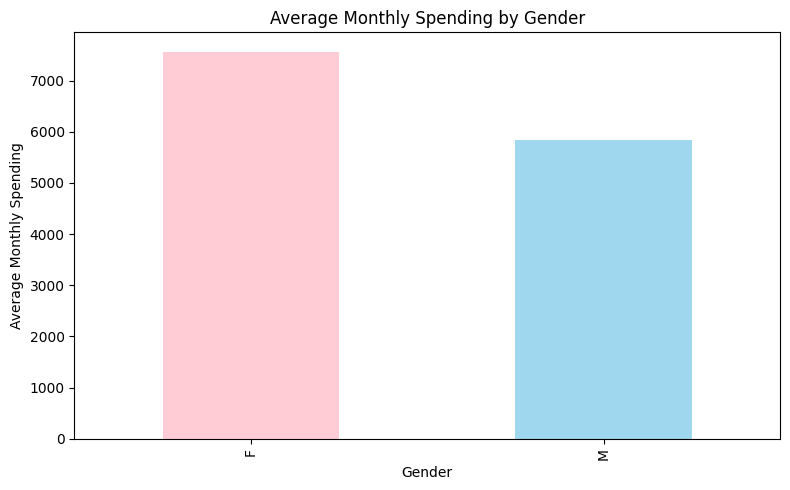

In [306]:
# Group by gender and plot monthly spending
gender_spending = final_df.groupby('gender')['total_monthly_spending'].mean()

# Plot
plt.figure(figsize=(8,5))
gender_spending.plot(kind = 'bar', color = ['pink', 'skyblue'], alpha = 0.8)
plt.title('Average Monthly Spending by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Monthly Spending')
plt.tight_layout()
plt.show()

Female spend more than male on a monthly average. This indicates that this feature is useful for predicting monthly spending of customers. 

#### [4.2] Job category

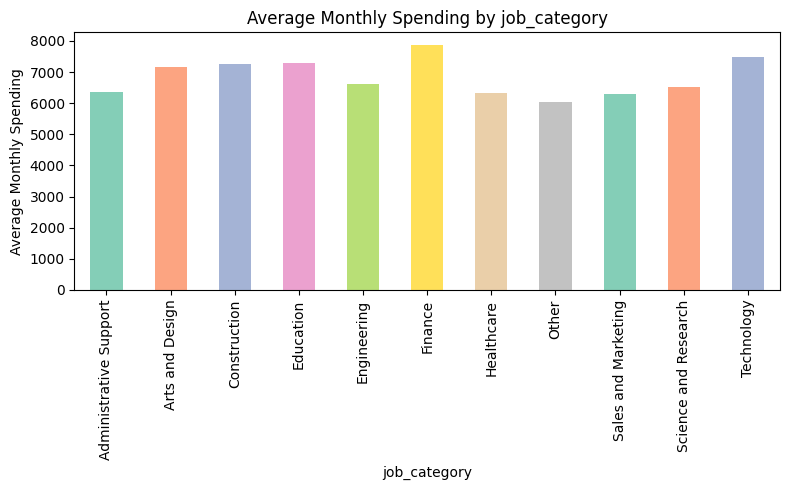

In [307]:
import seaborn as sns

# Group by job category and plot monthly spending
job_category_spending = final_df.groupby('job_category')['total_monthly_spending'].mean()

# Plot
plt.figure(figsize=(8,5))

# Choose a color palette from Seaborn
palette = sns.color_palette("Set2", n_colors=len(job_category_spending))

job_category_spending.plot(kind = 'bar', color = palette, alpha = 0.8)
plt.title('Average Monthly Spending by job_category')
plt.xlabel('job_category')
plt.ylabel('Average Monthly Spending')
plt.tight_layout()
plt.show()

C:\Users\sovan\AppData\Local\Temp\ipykernel_34588\424832915.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=final_df, x='age', y='total_monthly_spending', palette="viridis", alpha=0.9)


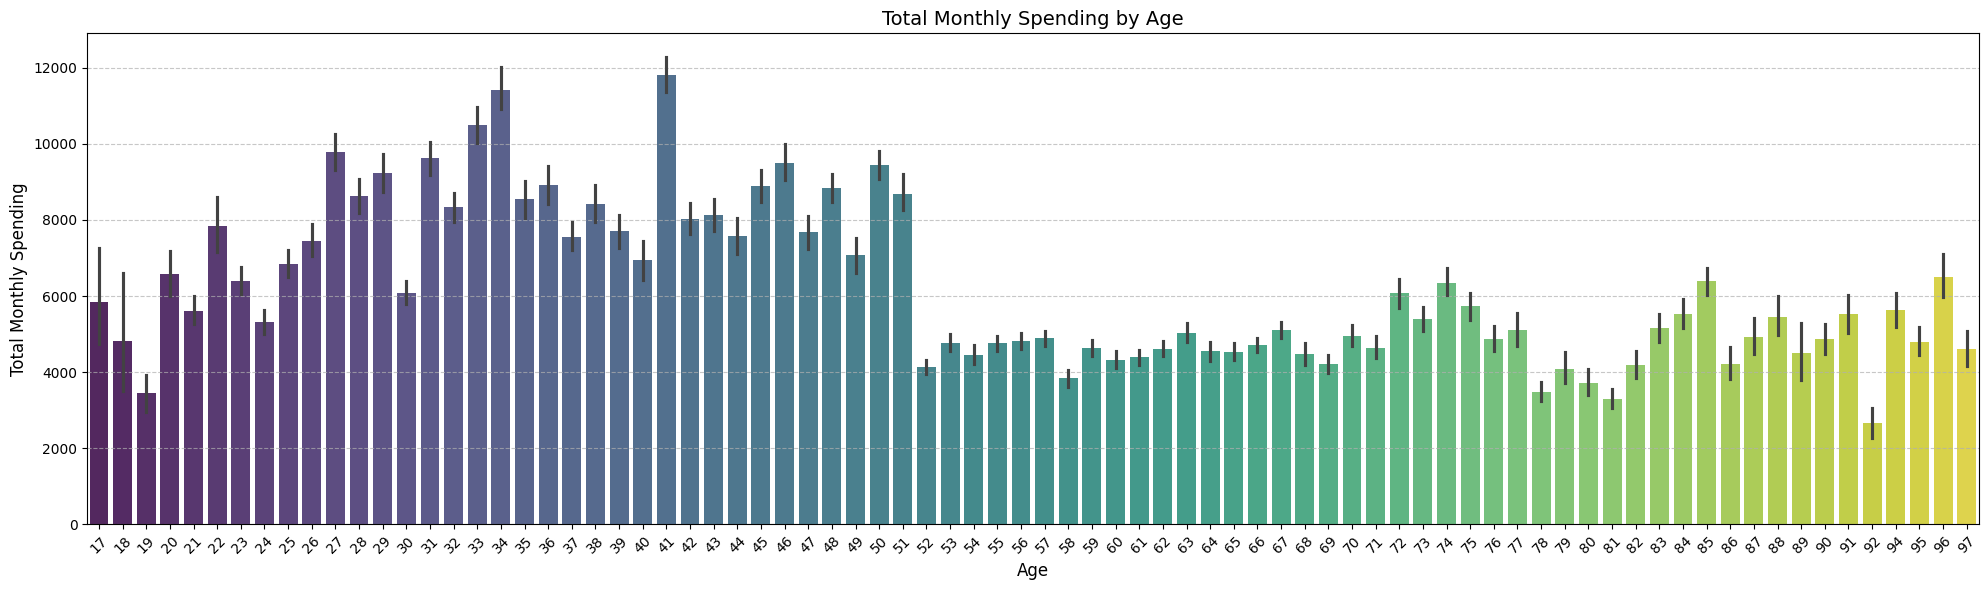

In [308]:
# Plot the data
plt.figure(figsize=(20, 6))
sns.barplot(data=final_df, x='age', y='total_monthly_spending', palette="viridis", alpha=0.9)

# Customize the plot
plt.title('Total Monthly Spending by Age', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Total Monthly Spending', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

#### [4.3] City Population

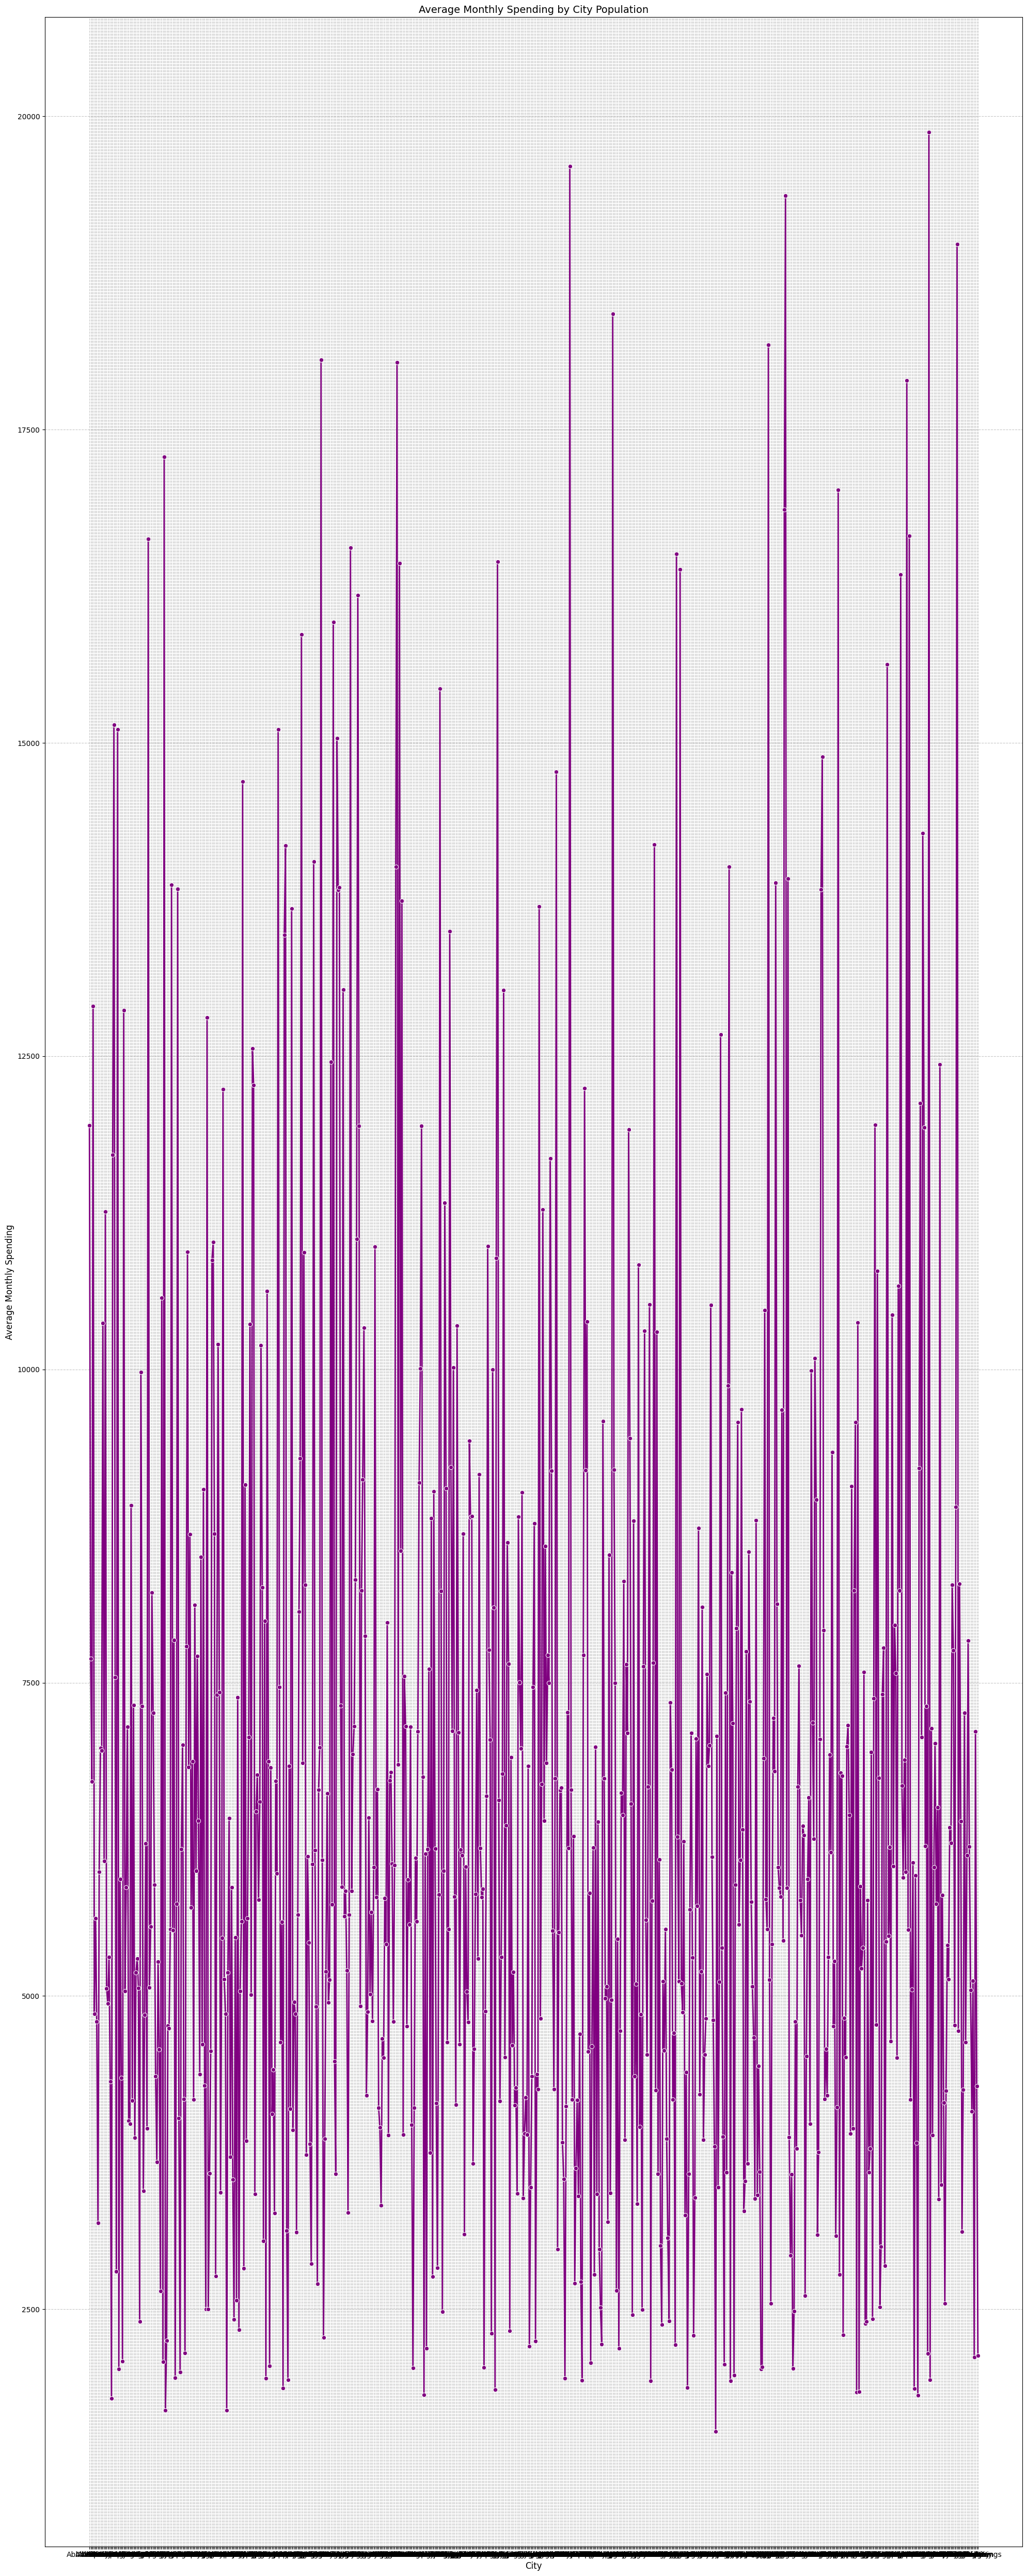

In [309]:
# Group by city population and calculate the mean monthly spending
grouped_data = final_df.groupby('city')['total_monthly_spending'].mean().reset_index()

# Plot the data
plt.figure(figsize=(20, 50))
sns.lineplot(data=grouped_data, x='city', y='total_monthly_spending', marker='o', color='purple', linewidth=2)

# Customize the plot
plt.title('Average Monthly Spending by City Population', fontsize=14)
plt.xlabel('City', fontsize=12)
plt.ylabel('Average Monthly Spending', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

It seems like it is not a clear positive relation between city population and monthly spending. Including city as a feature instead of city population might be more indicative for model to predict monthly spending

#### [4.4] Correlation Heatmap

In [310]:
num_cols = final_df.select_dtypes('number')

In [311]:
corr_matrix = num_cols.corr()

<Axes: >

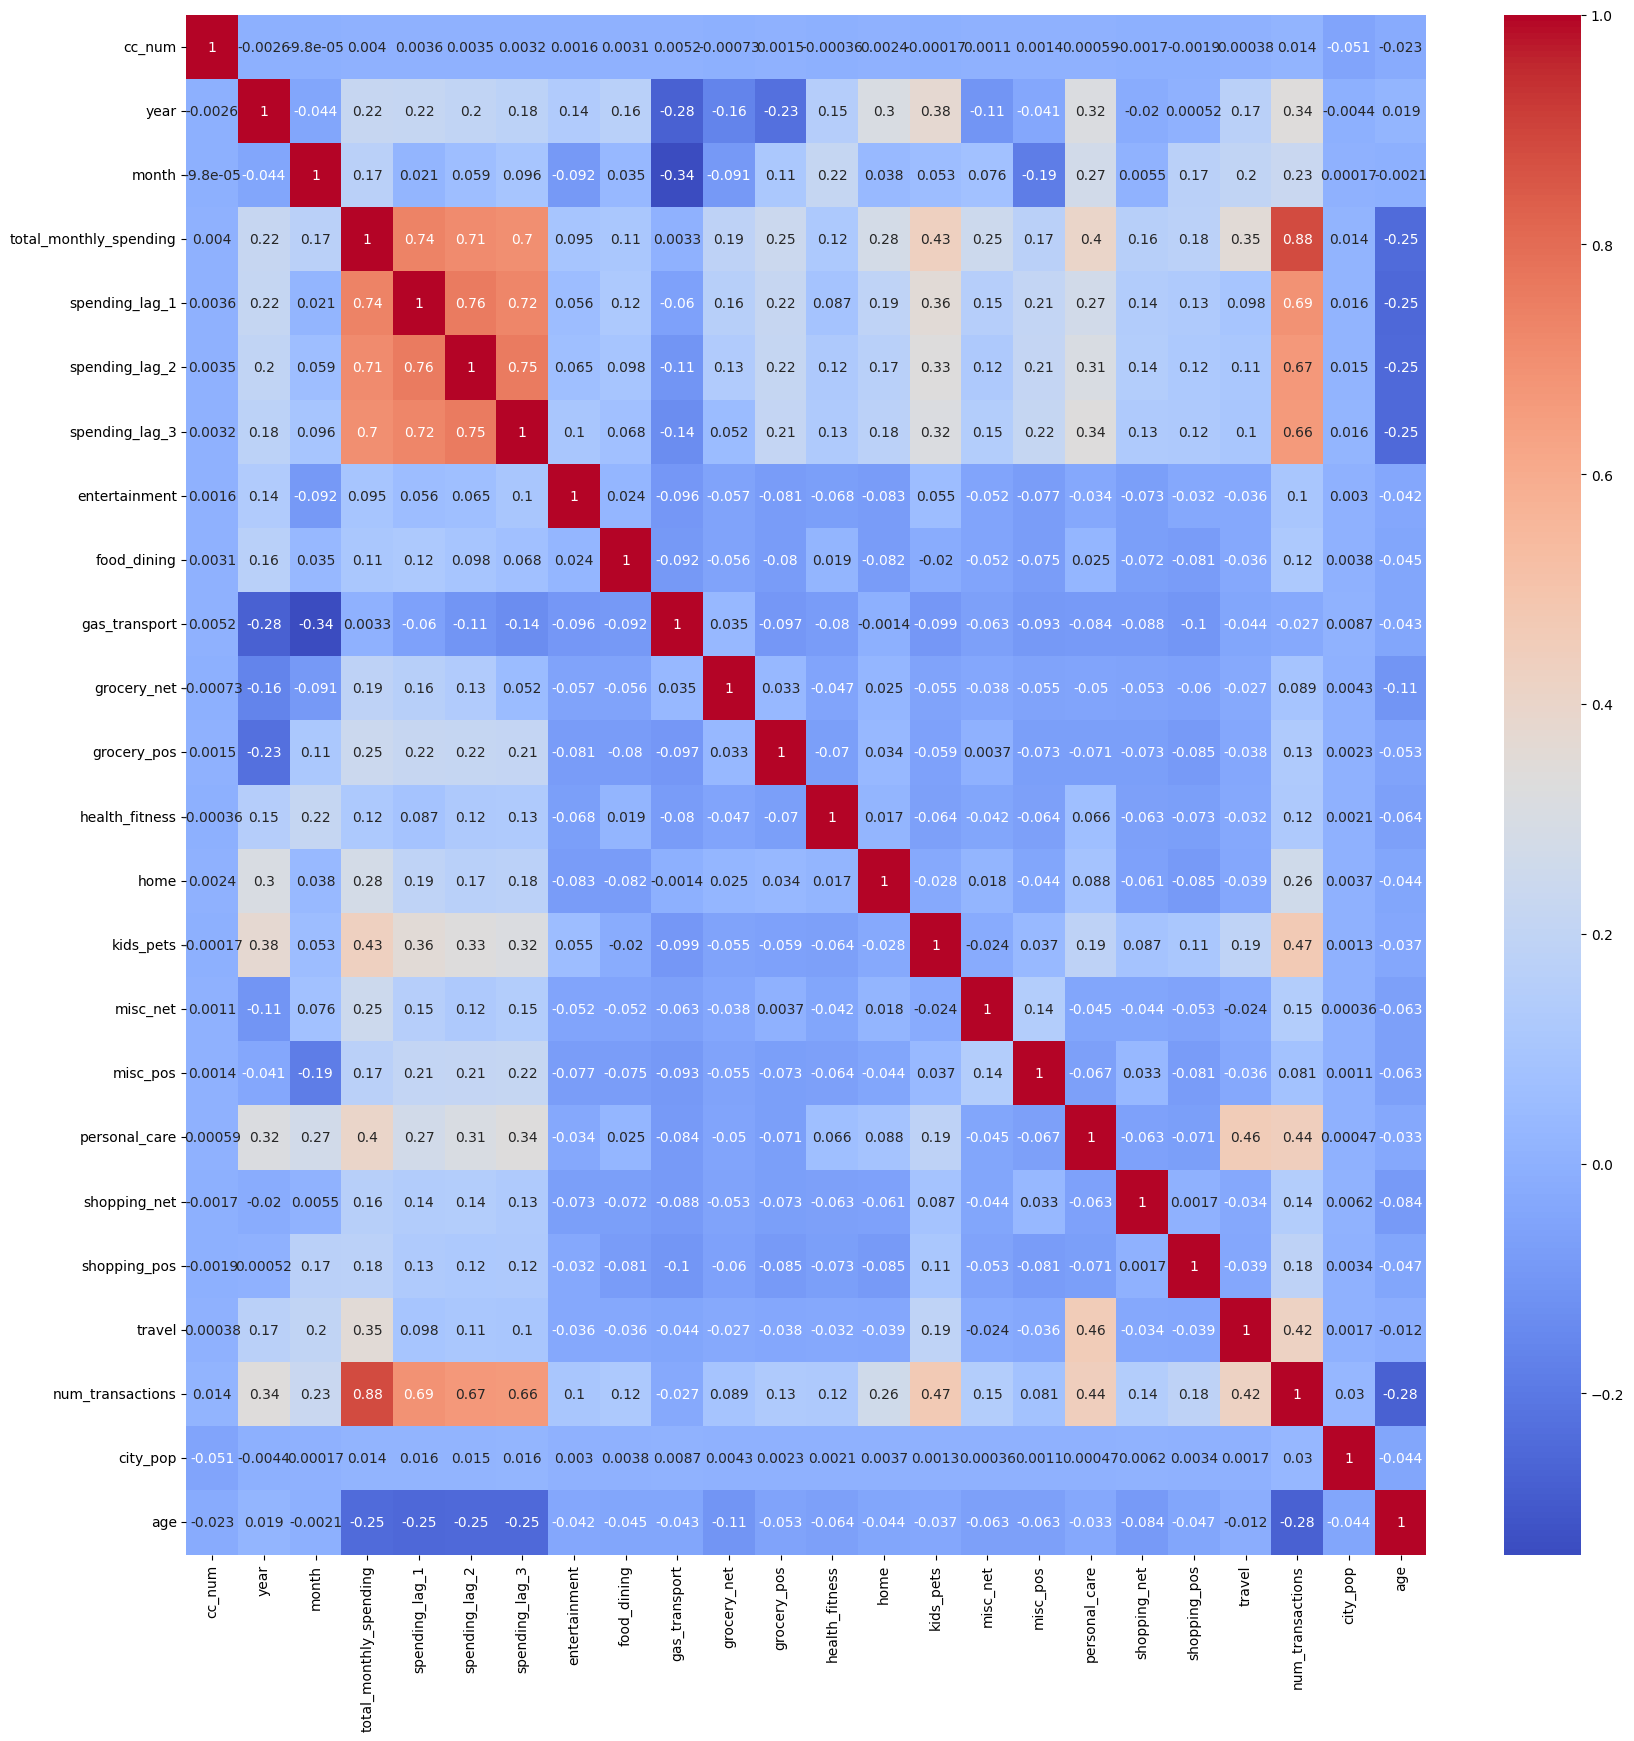

In [312]:
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap ='coolwarm')

### 5. Data Splitting

In [313]:
df_copy = final_df.copy().drop(['cc_num'], axis = 1)

In [314]:
df_copy.tail()

year  month  total_monthly_spending  spending_lag_1  spending_lag_2  \
43797  2022      8                 4962.25         6822.38         4743.58   
43798  2022      9                 4168.69         4962.25         6822.38   
43799  2022     10                12604.28         4168.69         4962.25   
43800  2022     11                 3604.19        12604.28         4168.69   
43801  2022     12                12115.65         3604.19        12604.28   

       spending_lag_3  entertainment  food_dining  gas_transport  grocery_net  \
43797         4824.19        4452.26       340.38            0.0          0.0   
43798         4743.58           0.00      4168.69            0.0          0.0   
43799         6822.38           0.00         0.00            0.0          0.0   
43800         4962.25           0.00         0.00            0.0          0.0   
43801         4168.69           0.00         0.00            0.0          0.0   

       ...  personal_care  shopping_net  shopping_pos   travel  \
43797  ...           0.00           0.0        169.61     0.00   
43798  ...           0.00           0.0          0.00     0.00   
43799  ...           0.00           0.0          0.00     0.00   
43800  ...           0.00           0.0          0.00     0.00   
43801  ...        8088.39           0.0          0.00  1539.66   

       num_transactions  gender         city  city_pop  job_category  age  
43797               127       M  Wright City      9760    Healthcare   26  
43798               105       M  Wright City      9760    Healthcare   26  
43799               110       M  Wright City      9760    Healthcare   26  
43800               102       M  Wright City      9760    Healthcare   26  
43801               213       M  Wright City      9760    Healthcare   26  

[5 rows x 26 columns]

+ We will split data into train and test. 2022 data will be the testing set and year < 2022 will be training

In [315]:
train_df = df_copy[df_copy['year'] < 2021]

In [316]:
train_df

year  month  total_monthly_spending  spending_lag_1  spending_lag_2  \
0      2018     12                    5.39             NaN             NaN   
1      2019      1                 3152.91            5.39             NaN   
2      2019      2                 9242.60         3152.91            5.39   
3      2019      3                 5701.32         9242.60         3152.91   
4      2019      4                 6016.01         5701.32         9242.60   
...     ...    ...                     ...             ...             ...   
43761  2020      8                 5666.73        10102.24        10407.78   
43762  2020      9                 5055.68         5666.73        10102.24   
43763  2020     10                 4275.57         5055.68         5666.73   
43764  2020     11                 3530.96         4275.57         5055.68   
43765  2020     12                 9255.48         3530.96         4275.57   

       spending_lag_3  entertainment  food_dining  gas_transport  grocery_net  \
0                 NaN           0.00          0.0           5.39          0.0   
1                 NaN           0.00          0.0        3152.91          0.0   
2                 NaN           0.00          0.0        9242.60          0.0   
3                5.39           0.00          0.0        5701.32          0.0   
4             3152.91           0.00          0.0        6016.01          0.0   
...               ...            ...          ...            ...          ...   
43761         6223.53           0.00          0.0           0.00          0.0   
43762        10407.78           0.00          0.0           0.00          0.0   
43763        10102.24           0.00          0.0           0.00          0.0   
43764         5666.73           0.00          0.0           0.00          0.0   
43765         5055.68        7199.64          0.0           0.00          0.0   

       ...  personal_care  shopping_net  shopping_pos  travel  \
0      ...            0.0           0.0          0.00     0.0   
1      ...            0.0           0.0          0.00     0.0   
2      ...            0.0           0.0          0.00     0.0   
3      ...            0.0           0.0          0.00     0.0   
4      ...            0.0           0.0          0.00     0.0   
...    ...            ...           ...           ...     ...   
43761  ...            0.0           0.0       5666.73     0.0   
43762  ...            0.0           0.0       5055.68     0.0   
43763  ...            0.0           0.0       4275.57     0.0   
43764  ...            0.0           0.0       3530.96     0.0   
43765  ...            0.0           0.0       2055.84     0.0   

       num_transactions  gender          city  city_pop          job_category  \
0                     1       M        Mobile    270712  Science and Research   
1                    64       M        Mobile    270712  Science and Research   
2                    58       M        Mobile    270712  Science and Research   
3                    92       M        Mobile    270712  Science and Research   
4                    72       M        Mobile    270712  Science and Research   
...                 ...     ...           ...       ...                   ...   
43761                88       F  Strongsville     44785   Sales and Marketing   
43762                75       F  Strongsville     44785   Sales and Marketing   
43763                85       F  Strongsville     44785   Sales and Marketing   
43764                72       F  Strongsville     44785   Sales and Marketing   
43765               138       F  Strongsville     44785   Sales and Marketing   

       age  
0       67  
1       67  
2       67  
3       67  
4       67  
...    ...  
43761   85  
43762   85  
43763   85  
43764   85  
43765   85  

[21607 rows x 26 columns]

In [317]:
val_df = df_copy[df_copy['year'] == 2021]

In [318]:
val_df

year  month  total_monthly_spending  spending_lag_1  spending_lag_2  \
25     2021      1                 4924.86         9391.80         4636.20   
26     2021      2                 2202.97         4924.86         9391.80   
27     2021      3                 6368.43         2202.97         4924.86   
28     2021      4                 4267.62         6368.43         2202.97   
29     2021      5                 7118.55         4267.62         6368.43   
...     ...    ...                     ...             ...             ...   
43773  2021      8                 4686.26         6237.14         6022.85   
43774  2021      9                 3429.83         4686.26         6237.14   
43775  2021     10                 5823.72         3429.83         4686.26   
43776  2021     11                 5125.32         5823.72         3429.83   
43777  2021     12                 9897.36         5125.32         5823.72   

       spending_lag_3  entertainment  food_dining  gas_transport  grocery_net  \
25            4732.03        4924.86         0.00            0.0          0.0   
26            4636.20        2202.97         0.00            0.0          0.0   
27            9391.80        6121.11       247.32            0.0          0.0   
28            4924.86           0.00      4267.62            0.0          0.0   
29            2202.97           0.00      7118.55            0.0          0.0   
...               ...            ...          ...            ...          ...   
43773         5939.29           0.00         0.00            0.0          0.0   
43774         6022.85           0.00         0.00            0.0          0.0   
43775         6237.14           0.00         0.00            0.0          0.0   
43776         4686.26           0.00         0.00            0.0          0.0   
43777         3429.83           0.00         0.00            0.0          0.0   

       ...  personal_care  shopping_net  shopping_pos  travel  \
25     ...            0.0           0.0           0.0     0.0   
26     ...            0.0           0.0           0.0     0.0   
27     ...            0.0           0.0           0.0     0.0   
28     ...            0.0           0.0           0.0     0.0   
29     ...            0.0           0.0           0.0     0.0   
...    ...            ...           ...           ...     ...   
43773  ...            0.0           0.0           0.0     0.0   
43774  ...            0.0           0.0           0.0     0.0   
43775  ...            0.0           0.0           0.0     0.0   
43776  ...            0.0           0.0           0.0     0.0   
43777  ...            0.0           0.0           0.0     0.0   

       num_transactions  gender          city  city_pop          job_category  \
25                   69       M        Mobile    270712  Science and Research   
26                   55       M        Mobile    270712  Science and Research   
27                   90       M        Mobile    270712  Science and Research   
28                   80       M        Mobile    270712  Science and Research   
29                   93       M        Mobile    270712  Science and Research   
...                 ...     ...           ...       ...                   ...   
43773                99       F  Strongsville     44785   Sales and Marketing   
43774                62       F  Strongsville     44785   Sales and Marketing   
43775               106       F  Strongsville     44785   Sales and Marketing   
43776                92       F  Strongsville     44785   Sales and Marketing   
43777               171       F  Strongsville     44785   Sales and Marketing   

       age  
25      67  
26      67  
27      67  
28      67  
29      67  
...    ...  
43773   85  
43774   85  
43775   85  
43776   85  
43777   85  

[10521 rows x 26 columns]

In [319]:
test_df = df_copy[df_copy['year'] == 2022]

In [320]:
test_df

year  month  total_monthly_spending  spending_lag_1  spending_lag_2  \
37     2022      1                 5229.30         8517.44         4794.68   
38     2022      2                 5114.51         5229.30         8517.44   
39     2022      3                 7304.92         5114.51         5229.30   
40     2022      4                 7875.90         7304.92         5114.51   
41     2022      5                 6758.72         7875.90         7304.92   
...     ...    ...                     ...             ...             ...   
43797  2022      8                 4962.25         6822.38         4743.58   
43798  2022      9                 4168.69         4962.25         6822.38   
43799  2022     10                12604.28         4168.69         4962.25   
43800  2022     11                 3604.19        12604.28         4168.69   
43801  2022     12                12115.65         3604.19        12604.28   

       spending_lag_3  entertainment  food_dining  gas_transport  grocery_net  \
37            5280.47           0.00         0.00        2286.67         0.00   
38            4794.68           0.00         0.00        2221.68         4.38   
39            8517.44           0.00         0.00          74.58       464.45   
40            5229.30           0.00         0.00           0.00         0.00   
41            5114.51           0.00         0.00           0.00         0.00   
...               ...            ...          ...            ...          ...   
43797         4824.19        4452.26       340.38           0.00         0.00   
43798         4743.58           0.00      4168.69           0.00         0.00   
43799         6822.38           0.00         0.00           0.00         0.00   
43800         4962.25           0.00         0.00           0.00         0.00   
43801         4168.69           0.00         0.00           0.00         0.00   

       ...  personal_care  shopping_net  shopping_pos   travel  \
37     ...           0.00          0.00          0.00     0.00   
38     ...           0.00          0.00          0.00     0.00   
39     ...           0.00          0.00          0.00     0.00   
40     ...           0.00          0.00          0.00     0.00   
41     ...           0.00        404.71          0.00     0.00   
...    ...            ...           ...           ...      ...   
43797  ...           0.00          0.00        169.61     0.00   
43798  ...           0.00          0.00          0.00     0.00   
43799  ...           0.00          0.00          0.00     0.00   
43800  ...           0.00          0.00          0.00     0.00   
43801  ...        8088.39          0.00          0.00  1539.66   

       num_transactions  gender         city  city_pop          job_category  \
37                   87       M       Mobile    270712  Science and Research   
38                   91       M       Mobile    270712  Science and Research   
39                  127       M       Mobile    270712  Science and Research   
40                  135       M       Mobile    270712  Science and Research   
41                  120       M       Mobile    270712  Science and Research   
...                 ...     ...          ...       ...                   ...   
43797               127       M  Wright City      9760            Healthcare   
43798               105       M  Wright City      9760            Healthcare   
43799               110       M  Wright City      9760            Healthcare   
43800               102       M  Wright City      9760            Healthcare   
43801               213       M  Wright City      9760            Healthcare   

       age  
37      67  
38      67  
39      67  
40      67  
41      67  
...    ...  
43797   26  
43798   26  
43799   26  
43800   26  
43801   26  

[11674 rows x 26 columns]

### 6. One-hot encode and scaling

In [321]:
# Sort by ascending time
train_df = train_df.sort_values(by = ['year', 'month'])

In [322]:
train_df

year  month  total_monthly_spending  spending_lag_1  spending_lag_2  \
0      2018     12                    5.39             NaN             NaN   
49     2018     12                   35.84             NaN             NaN   
98     2018     12                  123.98             NaN             NaN   
195    2018     12                  199.03             NaN             NaN   
244    2018     12                  124.16             NaN             NaN   
...     ...    ...                     ...             ...             ...   
43571  2020     12                11350.82         8971.33         5412.00   
43620  2020     12                 8397.63         2864.00         7210.89   
43668  2020     12                19599.01        10420.23         8456.43   
43716  2020     12                 9776.49         5471.96         5925.72   
43765  2020     12                 9255.48         3530.96         4275.57   

       spending_lag_3  entertainment  food_dining  gas_transport  grocery_net  \
0                 NaN           0.00          0.0           5.39          0.0   
49                NaN           0.00          0.0          35.84          0.0   
98                NaN           0.00          0.0         123.98          0.0   
195               NaN           0.00          0.0         199.03          0.0   
244               NaN           0.00          0.0         124.16          0.0   
...               ...            ...          ...            ...          ...   
43571         4446.87           0.00          0.0           0.00          0.0   
43620         2416.42        6677.79          0.0           0.00          0.0   
43668         9190.39           0.00          0.0           0.00          0.0   
43716         4743.36        8488.35          0.0           0.00          0.0   
43765         5055.68        7199.64          0.0           0.00          0.0   

       ...  personal_care  shopping_net  shopping_pos  travel  \
0      ...            0.0           0.0          0.00     0.0   
49     ...            0.0           0.0          0.00     0.0   
98     ...            0.0           0.0          0.00     0.0   
195    ...            0.0           0.0          0.00     0.0   
244    ...            0.0           0.0          0.00     0.0   
...    ...            ...           ...           ...     ...   
43571  ...            0.0           0.0      11350.82     0.0   
43620  ...            0.0           0.0       1719.84     0.0   
43668  ...            0.0           0.0      19599.01     0.0   
43716  ...            0.0           0.0       1288.14     0.0   
43765  ...            0.0           0.0       2055.84     0.0   

       num_transactions  gender             city  city_pop  \
0                     1       M           Mobile    270712   
49                    1       F     Battle Creek     92270   
98                    3       M        Rochester     29816   
195                   1       F         Brooklyn   2504700   
244                   2       M        Cleveland    769341   
...                 ...     ...              ...       ...   
43571               162       F         Broadway      5896   
43620               121       F          Roanoke     27648   
43668               213       F      Westborough     18272   
43716               137       F  Fort Lauderdale    711693   
43765               138       F     Strongsville     44785   

               job_category  age  
0      Science and Research   67  
49                    Other   29  
98     Science and Research   45  
195         Arts and Design   41  
244              Technology   50  
...                     ...  ...  
43571  Science and Research   40  
43620           Engineering   67  
43668  Science and Research   34  
43716            Healthcare   94  
43765   Sales and Marketing   85  

[21607 rows x 26 columns]

In [323]:
# Drop NA
train_df = train_df.dropna()

In [324]:
train_df

year  month  total_monthly_spending  spending_lag_1  spending_lag_2  \
3      2019      3                 5701.32         9242.60         3152.91   
52     2019      3                14394.33         9496.64         8462.48   
101    2019      3                 7044.65         3895.19         4241.29   
198    2019      3                17349.08        16580.86        13079.96   
247    2019      3                 6595.73         3875.62         4499.52   
...     ...    ...                     ...             ...             ...   
43571  2020     12                11350.82         8971.33         5412.00   
43620  2020     12                 8397.63         2864.00         7210.89   
43668  2020     12                19599.01        10420.23         8456.43   
43716  2020     12                 9776.49         5471.96         5925.72   
43765  2020     12                 9255.48         3530.96         4275.57   

       spending_lag_3  entertainment  food_dining  gas_transport  grocery_net  \
3                5.39           0.00          0.0        5701.32         0.00   
52              35.84           0.00          0.0        2881.61     11512.72   
101            123.98           0.00          0.0        7044.65         0.00   
198            199.03           0.00          0.0        4051.94     13297.14   
247            124.16           0.00          0.0        6595.73         0.00   
...               ...            ...          ...            ...          ...   
43571         4446.87           0.00          0.0           0.00         0.00   
43620         2416.42        6677.79          0.0           0.00         0.00   
43668         9190.39           0.00          0.0           0.00         0.00   
43716         4743.36        8488.35          0.0           0.00         0.00   
43765         5055.68        7199.64          0.0           0.00         0.00   

       ...  personal_care  shopping_net  shopping_pos  travel  \
3      ...            0.0           0.0          0.00     0.0   
52     ...            0.0           0.0          0.00     0.0   
101    ...            0.0           0.0          0.00     0.0   
198    ...            0.0           0.0          0.00     0.0   
247    ...            0.0           0.0          0.00     0.0   
...    ...            ...           ...           ...     ...   
43571  ...            0.0           0.0      11350.82     0.0   
43620  ...            0.0           0.0       1719.84     0.0   
43668  ...            0.0           0.0      19599.01     0.0   
43716  ...            0.0           0.0       1288.14     0.0   
43765  ...            0.0           0.0       2055.84     0.0   

       num_transactions  gender             city  city_pop  \
3                    92       M           Mobile    270712   
52                  118       F     Battle Creek     92270   
101                 104       M        Rochester     29816   
198                 151       F         Brooklyn   2504700   
247                 115       M        Cleveland    769341   
...                 ...     ...              ...       ...   
43571               162       F         Broadway      5896   
43620               121       F          Roanoke     27648   
43668               213       F      Westborough     18272   
43716               137       F  Fort Lauderdale    711693   
43765               138       F     Strongsville     44785   

               job_category  age  
3      Science and Research   67  
52                    Other   29  
101    Science and Research   45  
198         Arts and Design   41  
247              Technology   50  
...                     ...  ...  
43571  Science and Research   40  
43620           Engineering   67  
43668  Science and Research   34  
43716            Healthcare   94  
43765   Sales and Marketing   85  

[18955 rows x 26 columns]

In [325]:
from my_krml_ratana.data.sets import pop_target

In [326]:
X_train, y_train = pop_target(train_df, 'total_monthly_spending')

In [327]:
X_train

year  month  spending_lag_1  spending_lag_2  spending_lag_3  \
3      2019      3         9242.60         3152.91            5.39   
52     2019      3         9496.64         8462.48           35.84   
101    2019      3         3895.19         4241.29          123.98   
198    2019      3        16580.86        13079.96          199.03   
247    2019      3         3875.62         4499.52          124.16   
...     ...    ...             ...             ...             ...   
43571  2020     12         8971.33         5412.00         4446.87   
43620  2020     12         2864.00         7210.89         2416.42   
43668  2020     12        10420.23         8456.43         9190.39   
43716  2020     12         5471.96         5925.72         4743.36   
43765  2020     12         3530.96         4275.57         5055.68   

       entertainment  food_dining  gas_transport  grocery_net  grocery_pos  \
3               0.00          0.0        5701.32         0.00          0.0   
52              0.00          0.0        2881.61     11512.72          0.0   
101             0.00          0.0        7044.65         0.00          0.0   
198             0.00          0.0        4051.94     13297.14          0.0   
247             0.00          0.0        6595.73         0.00          0.0   
...              ...          ...            ...          ...          ...   
43571           0.00          0.0           0.00         0.00          0.0   
43620        6677.79          0.0           0.00         0.00          0.0   
43668           0.00          0.0           0.00         0.00          0.0   
43716        8488.35          0.0           0.00         0.00          0.0   
43765        7199.64          0.0           0.00         0.00          0.0   

       ...  personal_care  shopping_net  shopping_pos  travel  \
3      ...            0.0           0.0          0.00     0.0   
52     ...            0.0           0.0          0.00     0.0   
101    ...            0.0           0.0          0.00     0.0   
198    ...            0.0           0.0          0.00     0.0   
247    ...            0.0           0.0          0.00     0.0   
...    ...            ...           ...           ...     ...   
43571  ...            0.0           0.0      11350.82     0.0   
43620  ...            0.0           0.0       1719.84     0.0   
43668  ...            0.0           0.0      19599.01     0.0   
43716  ...            0.0           0.0       1288.14     0.0   
43765  ...            0.0           0.0       2055.84     0.0   

       num_transactions  gender             city  city_pop  \
3                    92       M           Mobile    270712   
52                  118       F     Battle Creek     92270   
101                 104       M        Rochester     29816   
198                 151       F         Brooklyn   2504700   
247                 115       M        Cleveland    769341   
...                 ...     ...              ...       ...   
43571               162       F         Broadway      5896   
43620               121       F          Roanoke     27648   
43668               213       F      Westborough     18272   
43716               137       F  Fort Lauderdale    711693   
43765               138       F     Strongsville     44785   

               job_category  age  
3      Science and Research   67  
52                    Other   29  
101    Science and Research   45  
198         Arts and Design   41  
247              Technology   50  
...                     ...  ...  
43571  Science and Research   40  
43620           Engineering   67  
43668  Science and Research   34  
43716            Healthcare   94  
43765   Sales and Marketing   85  

[18955 rows x 25 columns]

In [328]:
y_train

3         5701.32
52       14394.33
101       7044.65
198      17349.08
247       6595.73
           ...   
43571    11350.82
43620     8397.63
43668    19599.01
43716     9776.49
43765     9255.48
Name: total_monthly_spending, Length: 18955, dtype: float64

In [329]:
# Sort by ascending time
val_df = val_df.sort_values(by = ['year', 'month'])
val_df = val_df.dropna()

In [330]:
val_df

year  month  total_monthly_spending  spending_lag_1  spending_lag_2  \
25     2021      1                 4924.86         9391.80         4636.20   
74     2021      1                 4802.25        13354.47         6988.69   
123    2021      1                 3463.67        13833.41         4376.96   
171    2021      1                 3470.77        10899.15         7423.83   
220    2021      1                10789.79        25388.20        10371.48   
...     ...    ...                     ...             ...             ...   
43583  2021     12                14363.39         5962.08         9862.31   
43632  2021     12                 5296.92         3233.17         2336.80   
43680  2021     12                18404.49         9053.61         9150.12   
43728  2021     12                 8489.66         5450.05         5279.90   
43777  2021     12                 9897.36         5125.32         5823.72   

       spending_lag_3  entertainment  food_dining  gas_transport  grocery_net  \
25            4732.03        4924.86          0.0            0.0          0.0   
74            9681.69           0.00          0.0            0.0          0.0   
123           9319.81           0.00          0.0            0.0          0.0   
171           5015.71        3470.77          0.0            0.0          0.0   
220          13318.02           0.00          0.0            0.0          0.0   
...               ...            ...          ...            ...          ...   
43583         6583.13           0.00          0.0            0.0          0.0   
43632         2330.37           0.00          0.0            0.0          0.0   
43680         9592.94           0.00          0.0            0.0          0.0   
43728         4684.05           0.00          0.0            0.0          0.0   
43777         3429.83           0.00          0.0            0.0          0.0   

       ...  personal_care  shopping_net  shopping_pos  travel  \
25     ...            0.0           0.0          0.00     0.0   
74     ...            0.0           0.0       4802.25     0.0   
123    ...            0.0           0.0       3463.67     0.0   
171    ...            0.0           0.0          0.00     0.0   
220    ...            0.0           0.0      10789.79     0.0   
...    ...            ...           ...           ...     ...   
43583  ...            0.0           0.0          0.00     0.0   
43632  ...            0.0           0.0          0.00     0.0   
43680  ...            0.0           0.0          0.00     0.0   
43728  ...            0.0           0.0          0.00     0.0   
43777  ...            0.0           0.0          0.00     0.0   

       num_transactions  gender             city  city_pop  \
25                   69       M           Mobile    270712   
74                   72       F     Battle Creek     92270   
123                  74       M        Rochester     29816   
171                  46       M            Bronx   1382480   
220                 120       F         Brooklyn   2504700   
...                 ...     ...              ...       ...   
43583               169       F         Broadway      5896   
43632               101       F          Roanoke     27648   
43680               205       F      Westborough     18272   
43728               159       F  Fort Lauderdale    711693   
43777               171       F     Strongsville     44785   

               job_category  age  
25     Science and Research   67  
74                    Other   29  
123    Science and Research   45  
171                   Other   66  
220         Arts and Design   41  
...                     ...  ...  
43583  Science and Research   40  
43632           Engineering   67  
43680  Science and Research   34  
43728            Healthcare   94  
43777   Sales and Marketing   85  

[10512 rows x 26 columns]

In [331]:
X_val, y_val = pop_target(val_df, 'total_monthly_spending')

In [332]:
test_df = test_df.sort_values(by=['year', 'month'])

In [333]:
test_df = test_df.dropna()

In [334]:
test_df

year  month  total_monthly_spending  spending_lag_1  spending_lag_2  \
37     2022      1                 5229.30         8517.44         4794.68   
86     2022      1                11692.66        14089.46        11452.55   
135    2022      1                13859.00        14090.68         9835.25   
183    2022      1                 6969.72         8973.27         5756.28   
232    2022      1                13513.14        28187.22        19019.92   
...     ...    ...                     ...             ...             ...   
43644  2022     12                13128.41         6890.63         6980.36   
43692  2022     12                43475.50        16857.00        19685.57   
43740  2022     12                 8870.98         3888.74         5090.80   
43789  2022     12                20554.31         7656.67         9094.85   
43801  2022     12                12115.65         3604.19        12604.28   

       spending_lag_3  entertainment  food_dining  gas_transport  grocery_net  \
37            5280.47            0.0          0.0        2286.67         0.00   
86           10690.44            0.0          0.0        3330.75      2164.32   
135           7272.76            0.0          0.0        6951.01         0.00   
183           4418.93            0.0          0.0        3822.92         0.00   
232          11725.00            0.0          0.0        2035.71       420.85   
...               ...            ...          ...            ...          ...   
43644         6419.23            0.0          0.0           0.00         0.00   
43692        19746.95            0.0          0.0           0.00         0.00   
43740         5345.39            0.0          0.0           0.00         0.00   
43789         8079.43            0.0          0.0           0.00         0.00   
43801         4168.69            0.0          0.0           0.00         0.00   

       ...  personal_care  shopping_net  shopping_pos    travel  \
37     ...           0.00           0.0           0.0      0.00   
86     ...           0.00           0.0           0.0      0.00   
135    ...           0.00           0.0           0.0      0.00   
183    ...           0.00           0.0           0.0      0.00   
232    ...           0.00           0.0           0.0      0.00   
...    ...            ...           ...           ...       ...   
43644  ...        3065.50           0.0           0.0   8929.95   
43692  ...       20260.47           0.0           0.0  14177.60   
43740  ...           0.00           0.0           0.0   8870.98   
43789  ...        3475.96           0.0           0.0  15979.62   
43801  ...        8088.39           0.0           0.0   1539.66   

       num_transactions  gender             city  city_pop  \
37                   87       M           Mobile    270712   
86                  146       F     Battle Creek     92270   
135                 189       M        Rochester     29816   
183                 102       M            Bronx   1382480   
232                 175       F         Brooklyn   2504700   
...                 ...     ...              ...       ...   
43644               226       F          Roanoke     27648   
43692               522       F      Westborough     18272   
43740               161       F  Fort Lauderdale    711693   
43789               276       F     Strongsville     44785   
43801               213       M      Wright City      9760   

               job_category  age  
37     Science and Research   67  
86                    Other   29  
135    Science and Research   45  
183                   Other   66  
232         Arts and Design   41  
...                     ...  ...  
43644           Engineering   67  
43692  Science and Research   34  
43740            Healthcare   94  
43789   Sales and Marketing   85  
43801            Healthcare   26  

[11404 rows x 26 columns]

In [335]:
y_val

25        4924.86
74        4802.25
123       3463.67
171       3470.77
220      10789.79
           ...   
43583    14363.39
43632     5296.92
43680    18404.49
43728     8489.66
43777     9897.36
Name: total_monthly_spending, Length: 10512, dtype: float64

In [336]:
X_test, y_test = pop_target(test_df, 'total_monthly_spending')

In [337]:
X_test

year  month  spending_lag_1  spending_lag_2  spending_lag_3  \
37     2022      1         8517.44         4794.68         5280.47   
86     2022      1        14089.46        11452.55        10690.44   
135    2022      1        14090.68         9835.25         7272.76   
183    2022      1         8973.27         5756.28         4418.93   
232    2022      1        28187.22        19019.92        11725.00   
...     ...    ...             ...             ...             ...   
43644  2022     12         6890.63         6980.36         6419.23   
43692  2022     12        16857.00        19685.57        19746.95   
43740  2022     12         3888.74         5090.80         5345.39   
43789  2022     12         7656.67         9094.85         8079.43   
43801  2022     12         3604.19        12604.28         4168.69   

       entertainment  food_dining  gas_transport  grocery_net  grocery_pos  \
37               0.0          0.0        2286.67         0.00          0.0   
86               0.0          0.0        3330.75      2164.32          0.0   
135              0.0          0.0        6951.01         0.00          0.0   
183              0.0          0.0        3822.92         0.00          0.0   
232              0.0          0.0        2035.71       420.85          0.0   
...              ...          ...            ...          ...          ...   
43644            0.0          0.0           0.00         0.00          0.0   
43692            0.0          0.0           0.00         0.00          0.0   
43740            0.0          0.0           0.00         0.00          0.0   
43789            0.0          0.0           0.00         0.00          0.0   
43801            0.0          0.0           0.00         0.00          0.0   

       ...  personal_care  shopping_net  shopping_pos    travel  \
37     ...           0.00           0.0           0.0      0.00   
86     ...           0.00           0.0           0.0      0.00   
135    ...           0.00           0.0           0.0      0.00   
183    ...           0.00           0.0           0.0      0.00   
232    ...           0.00           0.0           0.0      0.00   
...    ...            ...           ...           ...       ...   
43644  ...        3065.50           0.0           0.0   8929.95   
43692  ...       20260.47           0.0           0.0  14177.60   
43740  ...           0.00           0.0           0.0   8870.98   
43789  ...        3475.96           0.0           0.0  15979.62   
43801  ...        8088.39           0.0           0.0   1539.66   

       num_transactions  gender             city  city_pop  \
37                   87       M           Mobile    270712   
86                  146       F     Battle Creek     92270   
135                 189       M        Rochester     29816   
183                 102       M            Bronx   1382480   
232                 175       F         Brooklyn   2504700   
...                 ...     ...              ...       ...   
43644               226       F          Roanoke     27648   
43692               522       F      Westborough     18272   
43740               161       F  Fort Lauderdale    711693   
43789               276       F     Strongsville     44785   
43801               213       M      Wright City      9760   

               job_category  age  
37     Science and Research   67  
86                    Other   29  
135    Science and Research   45  
183                   Other   66  
232         Arts and Design   41  
...                     ...  ...  
43644           Engineering   67  
43692  Science and Research   34  
43740            Healthcare   94  
43789   Sales and Marketing   85  
43801            Healthcare   26  

[11404 rows x 25 columns]

In [338]:
y_test

37        5229.30
86       11692.66
135      13859.00
183       6969.72
232      13513.14
           ...   
43644    13128.41
43692    43475.50
43740     8870.98
43789    20554.31
43801    12115.65
Name: total_monthly_spending, Length: 11404, dtype: float64

In [339]:
cat_cols = X_train.select_dtypes(exclude=['number']).columns
num_cols = X_train.select_dtypes(include=['number']).columns.difference(['month', 'year']) # Exclude month and year

In [340]:
num_cols

Index(['age', 'city_pop', 'entertainment', 'food_dining', 'gas_transport',
       'grocery_net', 'grocery_pos', 'health_fitness', 'home', 'kids_pets',
       'misc_net', 'misc_pos', 'num_transactions', 'personal_care',
       'shopping_net', 'shopping_pos', 'spending_lag_1', 'spending_lag_2',
       'spending_lag_3', 'travel'],
      dtype='object')

In [341]:
cat_cols

Index(['gender', 'city', 'job_category'], dtype='object')

### [6.1] One-hot encode categorical variables

In [342]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [343]:
ohe = OneHotEncoder(sparse_output = False, drop='first')

In [344]:
encode_cat = ohe.fit_transform(X_train[cat_cols])

In [345]:
encode_cat_df = pd.DataFrame(encode_cat,
                            columns=ohe.get_feature_names_out(cat_cols),
                            index = X_train.index)

In [346]:
encode_cat_df

gender_M  city_Abilene  city_Acton  city_Ada  city_Adairville  \
3           1.0           0.0         0.0       0.0              0.0   
52          0.0           0.0         0.0       0.0              0.0   
101         1.0           0.0         0.0       0.0              0.0   
198         0.0           0.0         0.0       0.0              0.0   
247         1.0           0.0         0.0       0.0              0.0   
...         ...           ...         ...       ...              ...   
43571       0.0           0.0         0.0       0.0              0.0   
43620       0.0           0.0         0.0       0.0              0.0   
43668       0.0           0.0         0.0       0.0              0.0   
43716       0.0           0.0         0.0       0.0              0.0   
43765       0.0           0.0         0.0       0.0              0.0   

       city_Albany  city_Albuquerque  city_Alexandria  city_Alma  city_Alton  \
3              0.0               0.0              0.0        0.0         0.0   
52             0.0               0.0              0.0        0.0         0.0   
101            0.0               0.0              0.0        0.0         0.0   
198            0.0               0.0              0.0        0.0         0.0   
247            0.0               0.0              0.0        0.0         0.0   
...            ...               ...              ...        ...         ...   
43571          0.0               0.0              0.0        0.0         0.0   
43620          0.0               0.0              0.0        0.0         0.0   
43668          0.0               0.0              0.0        0.0         0.0   
43716          0.0               0.0              0.0        0.0         0.0   
43765          0.0               0.0              0.0        0.0         0.0   

       ...  job_category_Arts and Design  job_category_Construction  \
3      ...                           0.0                        0.0   
52     ...                           0.0                        0.0   
101    ...                           0.0                        0.0   
198    ...                           1.0                        0.0   
247    ...                           0.0                        0.0   
...    ...                           ...                        ...   
43571  ...                           0.0                        0.0   
43620  ...                           0.0                        0.0   
43668  ...                           0.0                        0.0   
43716  ...                           0.0                        0.0   
43765  ...                           0.0                        0.0   

       job_category_Education  job_category_Engineering  job_category_Finance  \
3                         0.0                       0.0                   0.0   
52                        0.0                       0.0                   0.0   
101                       0.0                       0.0                   0.0   
198                       0.0                       0.0                   0.0   
247                       0.0                       0.0                   0.0   
...                       ...                       ...                   ...   
43571                     0.0                       0.0                   0.0   
43620                     0.0                       1.0                   0.0   
43668                     0.0                       0.0                   0.0   
43716                     0.0                       0.0                   0.0   
43765                     0.0                       0.0                   0.0   

       job_category_Healthcare  job_category_Other  \
3                          0.0                 0.0   
52                         0.0                 1.0   
101                        0.0                 0.0   
198                        0.0                 0.0   
247                        0.0                 0.0   
...                        ... 

### [6.2] Standard scale numerical variables

In [347]:
scaler = StandardScaler()

In [348]:
scaled_numerical = scaler.fit_transform(X_train[num_cols])
scaled_numerical_df = pd.DataFrame(scaled_numerical,
                                  columns= num_cols,
                                  index = X_train.index)

In [349]:
scaled_numerical_df

age  city_pop  entertainment  food_dining  gas_transport  \
3      0.937329 -0.042433      -0.133169    -0.023427       2.838888   
52    -1.146097 -0.369199      -0.133169    -0.023427       1.259388   
101   -0.268865 -0.483566      -0.133169    -0.023427       3.591372   
198   -0.488173  4.048476      -0.133169    -0.023427       1.914965   
247    0.005270  0.870663      -0.133169    -0.023427       3.339904   
...         ...       ...            ...          ...            ...   
43571 -0.543000 -0.527368      -0.133169    -0.023427      -0.354785   
43620  0.937329 -0.487536       6.420478    -0.023427      -0.354785   
43668 -0.871962 -0.504705      -0.133169    -0.023427      -0.354785   
43716  2.417659  0.765097       8.197379    -0.023427      -0.354785   
43765  1.924216 -0.456154       6.932627    -0.023427      -0.354785   

       grocery_net  grocery_pos  health_fitness      home  kids_pets  \
3        -0.266729    -0.398804       -0.013959 -0.021847  -0.024649   
52        4.557601    -0.398804       -0.013959 -0.021847  -0.024649   
101      -0.266729    -0.398804       -0.013959 -0.021847  -0.024649   
198       5.305351    -0.398804       -0.013959 -0.021847  -0.024649   
247      -0.266729    -0.398804       -0.013959 -0.021847  -0.024649   
...            ...          ...             ...       ...        ...   
43571    -0.266729    -0.398804       -0.013959 -0.021847  -0.024649   
43620    -0.266729    -0.398804       -0.013959 -0.021847  -0.024649   
43668    -0.266729    -0.398804       -0.013959 -0.021847  -0.024649   
43716    -0.266729    -0.398804       -0.013959 -0.021847  -0.024649   
43765    -0.266729    -0.398804       -0.013959 -0.021847  -0.024649   

       misc_net  misc_pos  num_transactions  personal_care  shopping_net  \
3     -0.246438 -0.376478          0.140443      -0.022945     -0.357239   
52    -0.246438 -0.376478          0.643722      -0.022945     -0.357239   
101   -0.246438 -0.376478          0.372725      -0.022945     -0.357239   
198   -0.246438 -0.376478          1.282499      -0.022945     -0.357239   
247   -0.246438 -0.376478          0.585651      -0.022945     -0.357239   
...         ...       ...               ...            ...           ...   
43571 -0.246438 -0.376478          1.495425      -0.022945     -0.357239   
43620 -0.246438 -0.376478          0.701792      -0.022945     -0.357239   
43668 -0.246438 -0.376478          2.482626      -0.022945     -0.357239   
43716 -0.246438 -0.376478          1.011503      -0.022945     -0.357239   
43765 -0.246438 -0.376478          1.030859      -0.022945     -0.357239   

       shopping_pos  spending_lag_1  spending_lag_2  spending_lag_3    travel  
3         -0.369125        0.716015       -0.608264       -1.236196 -0.014101  
52        -0.369125        0.771570        0.549772       -1.229661 -0.014101  
101       -0.369125       -0.453377       -0.370884       -1.210747 -0.014101  
198       -0.369125        2.320774        1.556860       -1.194641 -0.014101  
247       -0.369125       -0.457656       -0.314564       -1.210708 -0.014101  
...             ...             ...             ...             ...       ...  
43571      3.719950        0.656693       -0.115549       -0.283057 -0.014101  
43620      0.250439       -0.678881        0.276796       -0.718790 -0.014101  
43668      6.691318        0.973544        0.548452        0.734899 -0.014101  
43716      0.094921       -0.108563       -0.003504       -0.219431 -0.014101  
43765      0.371481       -0.533028       -0.363408       -0.152407 -0.014101  

[18955 rows x 20 columns]

In [350]:
X_train = pd.concat([X_train[['month', 'year']], scaled_numerical_df,encode_cat_df ], axis = 1)

In [351]:
X_train

month  year       age  city_pop  entertainment  food_dining  \
3          3  2019  0.937329 -0.042433      -0.133169    -0.023427   
52         3  2019 -1.146097 -0.369199      -0.133169    -0.023427   
101        3  2019 -0.268865 -0.483566      -0.133169    -0.023427   
198        3  2019 -0.488173  4.048476      -0.133169    -0.023427   
247        3  2019  0.005270  0.870663      -0.133169    -0.023427   
...      ...   ...       ...       ...            ...          ...   
43571     12  2020 -0.543000 -0.527368      -0.133169    -0.023427   
43620     12  2020  0.937329 -0.487536       6.420478    -0.023427   
43668     12  2020 -0.871962 -0.504705      -0.133169    -0.023427   
43716     12  2020  2.417659  0.765097       8.197379    -0.023427   
43765     12  2020  1.924216 -0.456154       6.932627    -0.023427   

       gas_transport  grocery_net  grocery_pos  health_fitness  ...  \
3           2.838888    -0.266729    -0.398804       -0.013959  ...   
52          1.259388     4.557601    -0.398804       -0.013959  ...   
101         3.591372    -0.266729    -0.398804       -0.013959  ...   
198         1.914965     5.305351    -0.398804       -0.013959  ...   
247         3.339904    -0.266729    -0.398804       -0.013959  ...   
...              ...          ...          ...             ...  ...   
43571      -0.354785    -0.266729    -0.398804       -0.013959  ...   
43620      -0.354785    -0.266729    -0.398804       -0.013959  ...   
43668      -0.354785    -0.266729    -0.398804       -0.013959  ...   
43716      -0.354785    -0.266729    -0.398804       -0.013959  ...   
43765      -0.354785    -0.266729    -0.398804       -0.013959  ...   

       job_category_Arts and Design  job_category_Construction  \
3                               0.0                        0.0   
52                              0.0                        0.0   
101                             0.0                        0.0   
198                             1.0                        0.0   
247                             0.0                        0.0   
...                             ...                        ...   
43571                           0.0                        0.0   
43620                           0.0                        0.0   
43668                           0.0                        0.0   
43716                           0.0                        0.0   
43765                           0.0                        0.0   

       job_category_Education  job_category_Engineering  job_category_Finance  \
3                         0.0                       0.0                   0.0   
52                        0.0                       0.0                   0.0   
101                       0.0                       0.0                   0.0   
198                       0.0                       0.0                   0.0   
247                       0.0                       0.0                   0.0   
...                       ...                       ...                   ...   
43571                     0.0                       0.0                   0.0   
43620                     0.0                       1.0                   0.0   
43668                     0.0                       0.0                   0.0   
43716                     0.0                       0.0                   0.0   
43765                     0.0                       0.0                   0.0   

       job_category_Healthcare  job_category_Other  \
3                          0.0                 0.0   
52                         0.0                 1.0   
101                        0.0                 0.0   
198                        0.0                 0.0   
247                        0.0                 0.0   
...                        ...                 ...   
43571                      0.0                 0.0   
43620                      0.0                 0.0   
43668                      0.0                 0.0   
43716  

In [352]:
# Apply the same to val data

In [353]:
encode_cat = ohe.fit_transform(X_val[cat_cols])
encode_cat_df = pd.DataFrame(encode_cat,
                            columns=ohe.get_feature_names_out(cat_cols),
                            index = X_val.index)

In [354]:
scaled_numerical = scaler.fit_transform(X_val[num_cols])
scaled_numerical_df = pd.DataFrame(scaled_numerical,
                                  columns= num_cols,
                                  index = X_val.index)

In [355]:
X_val = pd.concat([X_val[['month', 'year']], scaled_numerical_df,encode_cat_df ], axis = 1)

In [356]:
X_val

month  year       age  city_pop  entertainment  food_dining  \
25         1  2021  0.933665 -0.042206       1.388388    -0.530631   
74         1  2021 -1.147620 -0.368925      -0.511322    -0.530631   
123        1  2021 -0.271290 -0.483275      -0.511322    -0.530631   
171        1  2021  0.878894  1.993388       0.827489    -0.530631   
220        1  2021 -0.490372  4.048119      -0.511322    -0.530631   
...      ...   ...       ...       ...            ...          ...   
43583     12  2021 -0.545143 -0.527071      -0.511322    -0.530631   
43632     12  2021  0.933665 -0.487244      -0.511322    -0.530631   
43680     12  2021 -0.873767 -0.504411      -0.511322    -0.530631   
43728     12  2021  2.412472  0.765209      -0.511322    -0.530631   
43777     12  2021  1.919536 -0.455867      -0.511322    -0.530631   

       gas_transport  grocery_net  grocery_pos  health_fitness  ...  \
25         -0.027485    -0.020461     -0.05009       -0.450729  ...   
74         -0.027485    -0.020461     -0.05009       -0.450729  ...   
123        -0.027485    -0.020461     -0.05009       -0.450729  ...   
171        -0.027485    -0.020461     -0.05009       -0.450729  ...   
220        -0.027485    -0.020461     -0.05009       -0.450729  ...   
...              ...          ...          ...             ...  ...   
43583      -0.027485    -0.020461     -0.05009       -0.224295  ...   
43632      -0.027485    -0.020461     -0.05009       -0.450729  ...   
43680      -0.027485    -0.020461     -0.05009       -0.289257  ...   
43728      -0.027485    -0.020461     -0.05009       -0.450729  ...   
43777      -0.027485    -0.020461     -0.05009       -0.450729  ...   

       job_category_Arts and Design  job_category_Construction  \
25                              0.0                        0.0   
74                              0.0                        0.0   
123                             0.0                        0.0   
171                             0.0                        0.0   
220                             1.0                        0.0   
...                             ...                        ...   
43583                           0.0                        0.0   
43632                           0.0                        0.0   
43680                           0.0                        0.0   
43728                           0.0                        0.0   
43777                           0.0                        0.0   

       job_category_Education  job_category_Engineering  job_category_Finance  \
25                        0.0                       0.0                   0.0   
74                        0.0                       0.0                   0.0   
123                       0.0                       0.0                   0.0   
171                       0.0                       0.0                   0.0   
220                       0.0                       0.0                   0.0   
...                       ...                       ...                   ...   
43583                     0.0                       0.0                   0.0   
43632                     0.0                       1.0                   0.0   
43680                     0.0                       0.0                   0.0   
43728                     0.0                       0.0                   0.0   
43777                     0.0                       0.0                   0.0   

       job_category_Healthcare  job_category_Other  \
25                         0.0                 0.0   
74                         0.0                 1.0   
123                        0.0                 0.0   
171                        0.0                 1.0   
220                        0.0                 0.0   
...                        ...                 ...   
43583                      0.0                 0.0   
43632                      0.0                 0.0   
43680                      0.0                 0.0   
43728  

In [357]:
# Apply the same to test data

In [358]:
encode_cat = ohe.fit_transform(X_test[cat_cols])
encode_cat_df = pd.DataFrame(encode_cat,
                            columns=ohe.get_feature_names_out(cat_cols),
                            index = X_test.index)

In [359]:
scaled_numerical = scaler.fit_transform(X_test[num_cols])
scaled_numerical_df = pd.DataFrame(scaled_numerical,
                                  columns= num_cols,
                                  index = X_test.index)

In [360]:
X_test = pd.concat([X_test[['month', 'year']], scaled_numerical_df,encode_cat_df ], axis = 1)

In [361]:
X_test

month  year       age  city_pop  entertainment  food_dining  \
37         1  2022  0.880915 -0.033460      -0.267473    -0.298192   
86         1  2022 -1.168389 -0.365611      -0.267473    -0.298192   
135        1  2022 -0.305524 -0.481862      -0.267473    -0.298192   
183        1  2022  0.826986  2.035977      -0.267473    -0.298192   
232        1  2022 -0.521240  4.124868      -0.267473    -0.298192   
...      ...   ...       ...       ...            ...          ...   
43644     12  2022  0.880915 -0.485898      -0.267473    -0.298192   
43692     12  2022 -0.898743 -0.503350      -0.267473    -0.298192   
43740     12  2022  2.337000  0.787379      -0.267473    -0.298192   
43789     12  2022  1.851638 -0.453999      -0.267473    -0.298192   
43801     12  2022 -1.330176 -0.519194      -0.267473    -0.298192   

       gas_transport  grocery_net  grocery_pos  health_fitness  ...  \
37          1.604366    -0.216700    -0.286312       -0.273421  ...   
86          2.481904     1.640571    -0.286312       -0.273421  ...   
135         5.524695    -0.216700    -0.286312       -0.273421  ...   
183         2.895568    -0.216700    -0.286312       -0.273421  ...   
232         1.393436     0.144444    -0.286312       -0.273421  ...   
...              ...          ...          ...             ...  ...   
43644      -0.317557    -0.216700    -0.286312       -0.273421  ...   
43692      -0.317557    -0.216700    -0.286312       -0.273421  ...   
43740      -0.317557    -0.216700    -0.286312       -0.273421  ...   
43789      -0.317557    -0.216700    -0.286312       -0.273421  ...   
43801      -0.317557    -0.216700    -0.286312       -0.273421  ...   

       job_category_Arts and Design  job_category_Construction  \
37                              0.0                        0.0   
86                              0.0                        0.0   
135                             0.0                        0.0   
183                             0.0                        0.0   
232                             1.0                        0.0   
...                             ...                        ...   
43644                           0.0                        0.0   
43692                           0.0                        0.0   
43740                           0.0                        0.0   
43789                           0.0                        0.0   
43801                           0.0                        0.0   

       job_category_Education  job_category_Engineering  job_category_Finance  \
37                        0.0                       0.0                   0.0   
86                        0.0                       0.0                   0.0   
135                       0.0                       0.0                   0.0   
183                       0.0                       0.0                   0.0   
232                       0.0                       0.0                   0.0   
...                       ...                       ...                   ...   
43644                     0.0                       1.0                   0.0   
43692                     0.0                       0.0                   0.0   
43740                     0.0                       0.0                   0.0   
43789                     0.0                       0.0                   0.0   
43801                     0.0                       0.0                   0.0   

       job_category_Healthcare  job_category_Other  \
37                         0.0                 0.0   
86                         0.0                 1.0   
135                        0.0                 0.0   
183                        0.0                 1.0   
232                        0.0                 0.0   
...                        ...                 ...   
43644                      0.0                 0.0   
43692                      0.0                 0.0   
43740                      1.0                 0.0   
43789  

In [362]:
X_val

month  year       age  city_pop  entertainment  food_dining  \
25         1  2021  0.933665 -0.042206       1.388388    -0.530631   
74         1  2021 -1.147620 -0.368925      -0.511322    -0.530631   
123        1  2021 -0.271290 -0.483275      -0.511322    -0.530631   
171        1  2021  0.878894  1.993388       0.827489    -0.530631   
220        1  2021 -0.490372  4.048119      -0.511322    -0.530631   
...      ...   ...       ...       ...            ...          ...   
43583     12  2021 -0.545143 -0.527071      -0.511322    -0.530631   
43632     12  2021  0.933665 -0.487244      -0.511322    -0.530631   
43680     12  2021 -0.873767 -0.504411      -0.511322    -0.530631   
43728     12  2021  2.412472  0.765209      -0.511322    -0.530631   
43777     12  2021  1.919536 -0.455867      -0.511322    -0.530631   

       gas_transport  grocery_net  grocery_pos  health_fitness  ...  \
25         -0.027485    -0.020461     -0.05009       -0.450729  ...   
74         -0.027485    -0.020461     -0.05009       -0.450729  ...   
123        -0.027485    -0.020461     -0.05009       -0.450729  ...   
171        -0.027485    -0.020461     -0.05009       -0.450729  ...   
220        -0.027485    -0.020461     -0.05009       -0.450729  ...   
...              ...          ...          ...             ...  ...   
43583      -0.027485    -0.020461     -0.05009       -0.224295  ...   
43632      -0.027485    -0.020461     -0.05009       -0.450729  ...   
43680      -0.027485    -0.020461     -0.05009       -0.289257  ...   
43728      -0.027485    -0.020461     -0.05009       -0.450729  ...   
43777      -0.027485    -0.020461     -0.05009       -0.450729  ...   

       job_category_Arts and Design  job_category_Construction  \
25                              0.0                        0.0   
74                              0.0                        0.0   
123                             0.0                        0.0   
171                             0.0                        0.0   
220                             1.0                        0.0   
...                             ...                        ...   
43583                           0.0                        0.0   
43632                           0.0                        0.0   
43680                           0.0                        0.0   
43728                           0.0                        0.0   
43777                           0.0                        0.0   

       job_category_Education  job_category_Engineering  job_category_Finance  \
25                        0.0                       0.0                   0.0   
74                        0.0                       0.0                   0.0   
123                       0.0                       0.0                   0.0   
171                       0.0                       0.0                   0.0   
220                       0.0                       0.0                   0.0   
...                       ...                       ...                   ...   
43583                     0.0                       0.0                   0.0   
43632                     0.0                       1.0                   0.0   
43680                     0.0                       0.0                   0.0   
43728                     0.0                       0.0                   0.0   
43777                     0.0                       0.0                   0.0   

       job_category_Healthcare  job_category_Other  \
25                         0.0                 0.0   
74                         0.0                 1.0   
123                        0.0                 0.0   
171                        0.0                 1.0   
220                        0.0                 0.0   
...                        ...                 ...   
43583                      0.0                 0.0   
43632                      0.0                 0.0   
43680                      0.0                 0.0   
43728  

In [363]:
X_train

month  year       age  city_pop  entertainment  food_dining  \
3          3  2019  0.937329 -0.042433      -0.133169    -0.023427   
52         3  2019 -1.146097 -0.369199      -0.133169    -0.023427   
101        3  2019 -0.268865 -0.483566      -0.133169    -0.023427   
198        3  2019 -0.488173  4.048476      -0.133169    -0.023427   
247        3  2019  0.005270  0.870663      -0.133169    -0.023427   
...      ...   ...       ...       ...            ...          ...   
43571     12  2020 -0.543000 -0.527368      -0.133169    -0.023427   
43620     12  2020  0.937329 -0.487536       6.420478    -0.023427   
43668     12  2020 -0.871962 -0.504705      -0.133169    -0.023427   
43716     12  2020  2.417659  0.765097       8.197379    -0.023427   
43765     12  2020  1.924216 -0.456154       6.932627    -0.023427   

       gas_transport  grocery_net  grocery_pos  health_fitness  ...  \
3           2.838888    -0.266729    -0.398804       -0.013959  ...   
52          1.259388     4.557601    -0.398804       -0.013959  ...   
101         3.591372    -0.266729    -0.398804       -0.013959  ...   
198         1.914965     5.305351    -0.398804       -0.013959  ...   
247         3.339904    -0.266729    -0.398804       -0.013959  ...   
...              ...          ...          ...             ...  ...   
43571      -0.354785    -0.266729    -0.398804       -0.013959  ...   
43620      -0.354785    -0.266729    -0.398804       -0.013959  ...   
43668      -0.354785    -0.266729    -0.398804       -0.013959  ...   
43716      -0.354785    -0.266729    -0.398804       -0.013959  ...   
43765      -0.354785    -0.266729    -0.398804       -0.013959  ...   

       job_category_Arts and Design  job_category_Construction  \
3                               0.0                        0.0   
52                              0.0                        0.0   
101                             0.0                        0.0   
198                             1.0                        0.0   
247                             0.0                        0.0   
...                             ...                        ...   
43571                           0.0                        0.0   
43620                           0.0                        0.0   
43668                           0.0                        0.0   
43716                           0.0                        0.0   
43765                           0.0                        0.0   

       job_category_Education  job_category_Engineering  job_category_Finance  \
3                         0.0                       0.0                   0.0   
52                        0.0                       0.0                   0.0   
101                       0.0                       0.0                   0.0   
198                       0.0                       0.0                   0.0   
247                       0.0                       0.0                   0.0   
...                       ...                       ...                   ...   
43571                     0.0                       0.0                   0.0   
43620                     0.0                       1.0                   0.0   
43668                     0.0                       0.0                   0.0   
43716                     0.0                       0.0                   0.0   
43765                     0.0                       0.0                   0.0   

       job_category_Healthcare  job_category_Other  \
3                          0.0                 0.0   
52                         0.0                 1.0   
101                        0.0                 0.0   
198                        0.0                 0.0   
247                        0.0                 0.0   
...                        ...                 ...   
43571                      0.0                 0.0   
43620                      0.0                 0.0   
43668                      0.0                 0.0   
43716  

In [364]:
X_test

month  year       age  city_pop  entertainment  food_dining  \
37         1  2022  0.880915 -0.033460      -0.267473    -0.298192   
86         1  2022 -1.168389 -0.365611      -0.267473    -0.298192   
135        1  2022 -0.305524 -0.481862      -0.267473    -0.298192   
183        1  2022  0.826986  2.035977      -0.267473    -0.298192   
232        1  2022 -0.521240  4.124868      -0.267473    -0.298192   
...      ...   ...       ...       ...            ...          ...   
43644     12  2022  0.880915 -0.485898      -0.267473    -0.298192   
43692     12  2022 -0.898743 -0.503350      -0.267473    -0.298192   
43740     12  2022  2.337000  0.787379      -0.267473    -0.298192   
43789     12  2022  1.851638 -0.453999      -0.267473    -0.298192   
43801     12  2022 -1.330176 -0.519194      -0.267473    -0.298192   

       gas_transport  grocery_net  grocery_pos  health_fitness  ...  \
37          1.604366    -0.216700    -0.286312       -0.273421  ...   
86          2.481904     1.640571    -0.286312       -0.273421  ...   
135         5.524695    -0.216700    -0.286312       -0.273421  ...   
183         2.895568    -0.216700    -0.286312       -0.273421  ...   
232         1.393436     0.144444    -0.286312       -0.273421  ...   
...              ...          ...          ...             ...  ...   
43644      -0.317557    -0.216700    -0.286312       -0.273421  ...   
43692      -0.317557    -0.216700    -0.286312       -0.273421  ...   
43740      -0.317557    -0.216700    -0.286312       -0.273421  ...   
43789      -0.317557    -0.216700    -0.286312       -0.273421  ...   
43801      -0.317557    -0.216700    -0.286312       -0.273421  ...   

       job_category_Arts and Design  job_category_Construction  \
37                              0.0                        0.0   
86                              0.0                        0.0   
135                             0.0                        0.0   
183                             0.0                        0.0   
232                             1.0                        0.0   
...                             ...                        ...   
43644                           0.0                        0.0   
43692                           0.0                        0.0   
43740                           0.0                        0.0   
43789                           0.0                        0.0   
43801                           0.0                        0.0   

       job_category_Education  job_category_Engineering  job_category_Finance  \
37                        0.0                       0.0                   0.0   
86                        0.0                       0.0                   0.0   
135                       0.0                       0.0                   0.0   
183                       0.0                       0.0                   0.0   
232                       0.0                       0.0                   0.0   
...                       ...                       ...                   ...   
43644                     0.0                       1.0                   0.0   
43692                     0.0                       0.0                   0.0   
43740                     0.0                       0.0                   0.0   
43789                     0.0                       0.0                   0.0   
43801                     0.0                       0.0                   0.0   

       job_category_Healthcare  job_category_Other  \
37                         0.0                 0.0   
86                         0.0                 1.0   
135                        0.0                 0.0   
183                        0.0                 1.0   
232                        0.0                 0.0   
...                        ...                 ...   
43644                      0.0                 0.0   
43692                      0.0                 0.0   
43740                      1.0                 0.0   
43789  

#### Check to ensure same columns accross all set

In [365]:
# Find columns in X_train but not in X_test
columns_in_val_not_train = set(X_val.columns) - set(X_train.columns)

# Column in train not in val
# Find columns in X_test but not in X_train
columns_in_val_not_train = set(X_train.columns) - set(X_val.columns)

In [366]:
print("Columns in X_val but not in X_train:", columns_in_train_not_test)

Columns in X_val but not in X_train: set()


In [367]:
print("Columns in X_train but not in X_val:", columns_in_train_not_test)

Columns in X_train but not in X_val: set()


In [368]:
# Find columns in X_train but not in X_test
columns_in_train_not_test = set(X_train.columns) - set(X_test.columns)

# Find columns in X_test but not in X_train
columns_in_test_not_train = set(X_test.columns) - set(X_train.columns)

# Print the results
print("Columns in X_train but not in X_test:", columns_in_train_not_test)
print("Columns in X_test but not in X_train:", columns_in_test_not_train)

Columns in X_train but not in X_test: set()
Columns in X_test but not in X_train: {'city_Owings', 'city_Maple Shade', 'city_Henderson', 'city_Aiken', 'city_Newnan', 'city_Pierce City', 'city_Palatine', 'city_Norwalk', 'city_Blairsville', 'city_Roosevelt', 'city_Billings', 'city_Pollock', 'city_Sugar Land', 'city_Waco', 'city_Fruitland Park', 'city_Hattiesburg', 'city_Watertown', 'city_Zolfo Springs', 'city_Pomona', 'city_Tinley Park', 'city_Sparta', 'city_Cherokee Village', 'city_Dry Ridge', 'city_Freeport', 'city_Burlington', 'city_Andover', 'city_Odenton', 'city_Alturas', 'city_Pulaski', 'city_Portage', 'city_Buckeye', 'city_Wailuku', 'city_Lawrenceville', 'city_Sag Harbor', 'city_Fullerton', 'city_Moline', 'city_Sioux Falls', 'city_Max Meadows', 'city_Bellevue', 'city_Lincoln Park', 'city_Dothan', 'city_Renton', 'city_Elyria', 'city_Goldsboro', 'city_Wright City', 'city_Elko', 'city_Mesquite', 'city_Northville', 'city_Kahului', 'city_Russell', 'city_Ruffin', 'city_Kennedale', 'city_

In [369]:
# Fill missing set with zeroes

# Get all unique columns from both X_train and X_test
all_columns = set(X_train.columns) | set(X_test.columns) | set(X_val.columns) #set union

# Add missing columns to X_train with zero values
for col in all_columns:
    if col not in X_train.columns:
        X_train[col] = 0

# Add missing columns to X_test with zero values
for col in all_columns:
    if col not in X_test.columns:
        X_test[col] = 0

# Add missing columns to X_val with zero values
for col in all_columns:
    if col not in X_val.columns:
        X_val[col] = 0


In [370]:
X_test

month  year       age  city_pop  entertainment  food_dining  \
37         1  2022  0.880915 -0.033460      -0.267473    -0.298192   
86         1  2022 -1.168389 -0.365611      -0.267473    -0.298192   
135        1  2022 -0.305524 -0.481862      -0.267473    -0.298192   
183        1  2022  0.826986  2.035977      -0.267473    -0.298192   
232        1  2022 -0.521240  4.124868      -0.267473    -0.298192   
...      ...   ...       ...       ...            ...          ...   
43644     12  2022  0.880915 -0.485898      -0.267473    -0.298192   
43692     12  2022 -0.898743 -0.503350      -0.267473    -0.298192   
43740     12  2022  2.337000  0.787379      -0.267473    -0.298192   
43789     12  2022  1.851638 -0.453999      -0.267473    -0.298192   
43801     12  2022 -1.330176 -0.519194      -0.267473    -0.298192   

       gas_transport  grocery_net  grocery_pos  health_fitness  ...  \
37          1.604366    -0.216700    -0.286312       -0.273421  ...   
86          2.481904     1.640571    -0.286312       -0.273421  ...   
135         5.524695    -0.216700    -0.286312       -0.273421  ...   
183         2.895568    -0.216700    -0.286312       -0.273421  ...   
232         1.393436     0.144444    -0.286312       -0.273421  ...   
...              ...          ...          ...             ...  ...   
43644      -0.317557    -0.216700    -0.286312       -0.273421  ...   
43692      -0.317557    -0.216700    -0.286312       -0.273421  ...   
43740      -0.317557    -0.216700    -0.286312       -0.273421  ...   
43789      -0.317557    -0.216700    -0.286312       -0.273421  ...   
43801      -0.317557    -0.216700    -0.286312       -0.273421  ...   

       job_category_Arts and Design  job_category_Construction  \
37                              0.0                        0.0   
86                              0.0                        0.0   
135                             0.0                        0.0   
183                             0.0                        0.0   
232                             1.0                        0.0   
...                             ...                        ...   
43644                           0.0                        0.0   
43692                           0.0                        0.0   
43740                           0.0                        0.0   
43789                           0.0                        0.0   
43801                           0.0                        0.0   

       job_category_Education  job_category_Engineering  job_category_Finance  \
37                        0.0                       0.0                   0.0   
86                        0.0                       0.0                   0.0   
135                       0.0                       0.0                   0.0   
183                       0.0                       0.0                   0.0   
232                       0.0                       0.0                   0.0   
...                       ...                       ...                   ...   
43644                     0.0                       1.0                   0.0   
43692                     0.0                       0.0                   0.0   
43740                     0.0                       0.0                   0.0   
43789                     0.0                       0.0                   0.0   
43801                     0.0                       0.0                   0.0   

       job_category_Healthcare  job_category_Other  \
37                         0.0                 0.0   
86                         0.0                 1.0   
135                        0.0                 0.0   
183                        0.0                 1.0   
232                        0.0                 0.0   
...                        ...                 ...   
43644                      0.0                 0.0   
43692                      0.0                 0.0   
43740                      1.0                 0.0   
43789  

In [371]:
X_train

month  year       age  city_pop  entertainment  food_dining  \
3          3  2019  0.937329 -0.042433      -0.133169    -0.023427   
52         3  2019 -1.146097 -0.369199      -0.133169    -0.023427   
101        3  2019 -0.268865 -0.483566      -0.133169    -0.023427   
198        3  2019 -0.488173  4.048476      -0.133169    -0.023427   
247        3  2019  0.005270  0.870663      -0.133169    -0.023427   
...      ...   ...       ...       ...            ...          ...   
43571     12  2020 -0.543000 -0.527368      -0.133169    -0.023427   
43620     12  2020  0.937329 -0.487536       6.420478    -0.023427   
43668     12  2020 -0.871962 -0.504705      -0.133169    -0.023427   
43716     12  2020  2.417659  0.765097       8.197379    -0.023427   
43765     12  2020  1.924216 -0.456154       6.932627    -0.023427   

       gas_transport  grocery_net  grocery_pos  health_fitness  ...  \
3           2.838888    -0.266729    -0.398804       -0.013959  ...   
52          1.259388     4.557601    -0.398804       -0.013959  ...   
101         3.591372    -0.266729    -0.398804       -0.013959  ...   
198         1.914965     5.305351    -0.398804       -0.013959  ...   
247         3.339904    -0.266729    -0.398804       -0.013959  ...   
...              ...          ...          ...             ...  ...   
43571      -0.354785    -0.266729    -0.398804       -0.013959  ...   
43620      -0.354785    -0.266729    -0.398804       -0.013959  ...   
43668      -0.354785    -0.266729    -0.398804       -0.013959  ...   
43716      -0.354785    -0.266729    -0.398804       -0.013959  ...   
43765      -0.354785    -0.266729    -0.398804       -0.013959  ...   

       city_Waco  city_Ruffin  city_Cherokee Village  city_Henderson  \
3              0            0                      0               0   
52             0            0                      0               0   
101            0            0                      0               0   
198            0            0                      0               0   
247            0            0                      0               0   
...          ...          ...                    ...             ...   
43571          0            0                      0               0   
43620          0            0                      0               0   
43668          0            0                      0               0   
43716          0            0                      0               0   
43765          0            0                      0               0   

       city_Kennedale  city_Kahului  city_Odenton  city_Sioux Falls  \
3                   0             0             0                 0   
52                  0             0             0                 0   
101                 0             0             0                 0   
198                 0             0             0                 0   
247                 0             0             0                 0   
...               ...           ...           ...               ...   
43571               0             0             0                 0   
43620               0             0             0                 0   
43668               0             0             0                 0   
43716               0             0             0                 0   
43765               0             0             0                 0   

       city_Mesquite  city_Northville  
3                  0                0  
52                 0                0  
101                0                0  
198                0                0  
247                0                0  
...              ...              ...  
43571              0                0  
43620              0                0  
43668              0                0  
43716              0                0  
43765              0                0  

[18955 rows x 752 columns]

In [372]:
# Drop year column
X_train = X_train.drop(['year'], axis = 1)

In [373]:
# Drop year column
X_val = X_val.drop(['year'], axis = 1)

In [374]:
# Drop year column
X_test = X_test.drop(['year'], axis = 1)

In [375]:
X_train

month       age  city_pop  entertainment  food_dining  gas_transport  \
3          3  0.937329 -0.042433      -0.133169    -0.023427       2.838888   
52         3 -1.146097 -0.369199      -0.133169    -0.023427       1.259388   
101        3 -0.268865 -0.483566      -0.133169    -0.023427       3.591372   
198        3 -0.488173  4.048476      -0.133169    -0.023427       1.914965   
247        3  0.005270  0.870663      -0.133169    -0.023427       3.339904   
...      ...       ...       ...            ...          ...            ...   
43571     12 -0.543000 -0.527368      -0.133169    -0.023427      -0.354785   
43620     12  0.937329 -0.487536       6.420478    -0.023427      -0.354785   
43668     12 -0.871962 -0.504705      -0.133169    -0.023427      -0.354785   
43716     12  2.417659  0.765097       8.197379    -0.023427      -0.354785   
43765     12  1.924216 -0.456154       6.932627    -0.023427      -0.354785   

       grocery_net  grocery_pos  health_fitness      home  ...  city_Waco  \
3        -0.266729    -0.398804       -0.013959 -0.021847  ...          0   
52        4.557601    -0.398804       -0.013959 -0.021847  ...          0   
101      -0.266729    -0.398804       -0.013959 -0.021847  ...          0   
198       5.305351    -0.398804       -0.013959 -0.021847  ...          0   
247      -0.266729    -0.398804       -0.013959 -0.021847  ...          0   
...            ...          ...             ...       ...  ...        ...   
43571    -0.266729    -0.398804       -0.013959 -0.021847  ...          0   
43620    -0.266729    -0.398804       -0.013959 -0.021847  ...          0   
43668    -0.266729    -0.398804       -0.013959 -0.021847  ...          0   
43716    -0.266729    -0.398804       -0.013959 -0.021847  ...          0   
43765    -0.266729    -0.398804       -0.013959 -0.021847  ...          0   

       city_Ruffin  city_Cherokee Village  city_Henderson  city_Kennedale  \
3                0                      0               0               0   
52               0                      0               0               0   
101              0                      0               0               0   
198              0                      0               0               0   
247              0                      0               0               0   
...            ...                    ...             ...             ...   
43571            0                      0               0               0   
43620            0                      0               0               0   
43668            0                      0               0               0   
43716            0                      0               0               0   
43765            0                      0               0               0   

       city_Kahului  city_Odenton  city_Sioux Falls  city_Mesquite  \
3                 0             0                 0              0   
52                0             0                 0              0   
101               0             0                 0              0   
198               0             0                 0              0   
247               0             0                 0              0   
...             ...           ...               ...            ...   
43571             0             0                 0              0   
43620             0             0                 0              0   
43668             0             0                 0              0   
43716             0             0                 0              0   
43765             0             0                 0              0   

       city_Northville  
3                    0  
52                   0  
101                  0  
198                  0  
247                  0  
...                ...  
43571                0  
43620                0  
43668                0  
43716                0  
43765                0  

[18955 rows x 751 columns]

In [376]:
X_val

month       age  city_pop  entertainment  food_dining  gas_transport  \
25         1  0.933665 -0.042206       1.388388    -0.530631      -0.027485   
74         1 -1.147620 -0.368925      -0.511322    -0.530631      -0.027485   
123        1 -0.271290 -0.483275      -0.511322    -0.530631      -0.027485   
171        1  0.878894  1.993388       0.827489    -0.530631      -0.027485   
220        1 -0.490372  4.048119      -0.511322    -0.530631      -0.027485   
...      ...       ...       ...            ...          ...            ...   
43583     12 -0.545143 -0.527071      -0.511322    -0.530631      -0.027485   
43632     12  0.933665 -0.487244      -0.511322    -0.530631      -0.027485   
43680     12 -0.873767 -0.504411      -0.511322    -0.530631      -0.027485   
43728     12  2.412472  0.765209      -0.511322    -0.530631      -0.027485   
43777     12  1.919536 -0.455867      -0.511322    -0.530631      -0.027485   

       grocery_net  grocery_pos  health_fitness      home  ...  city_Waco  \
25       -0.020461     -0.05009       -0.450729 -0.285479  ...          0   
74       -0.020461     -0.05009       -0.450729 -0.285479  ...          0   
123      -0.020461     -0.05009       -0.450729 -0.285479  ...          0   
171      -0.020461     -0.05009       -0.450729 -0.285479  ...          0   
220      -0.020461     -0.05009       -0.450729 -0.285479  ...          0   
...            ...          ...             ...       ...  ...        ...   
43583    -0.020461     -0.05009       -0.224295  4.848099  ...          0   
43632    -0.020461     -0.05009       -0.450729  1.695916  ...          0   
43680    -0.020461     -0.05009       -0.289257  6.428381  ...          0   
43728    -0.020461     -0.05009       -0.450729  2.890210  ...          0   
43777    -0.020461     -0.05009       -0.450729  3.416782  ...          0   

       city_Ruffin  city_Cherokee Village  city_Henderson  city_Kennedale  \
25               0                      0               0               0   
74               0                      0               0               0   
123              0                      0               0               0   
171              0                      0               0               0   
220              0                      0               0               0   
...            ...                    ...             ...             ...   
43583            0                      0               0               0   
43632            0                      0               0               0   
43680            0                      0               0               0   
43728            0                      0               0               0   
43777            0                      0               0               0   

       city_Kahului  city_Odenton  city_Sioux Falls  city_Mesquite  \
25                0             0                 0              0   
74                0             0                 0              0   
123               0             0                 0              0   
171               0             0                 0              0   
220               0             0                 0              0   
...             ...           ...               ...            ...   
43583             0             0                 0              0   
43632             0             0                 0              0   
43680             0             0                 0              0   
43728             0             0                 0              0   
43777             0             0                 0              0   

       city_Northville  
25                   0  
74                   0  
123                  0  
171                  0  
220                  0  
...                ...  
43583                0  
43632                0  
43680                0  
43728                0  
43777                0  

[10512 rows x 751 columns]

In [377]:
X_test

month       age  city_pop  entertainment  food_dining  gas_transport  \
37         1  0.880915 -0.033460      -0.267473    -0.298192       1.604366   
86         1 -1.168389 -0.365611      -0.267473    -0.298192       2.481904   
135        1 -0.305524 -0.481862      -0.267473    -0.298192       5.524695   
183        1  0.826986  2.035977      -0.267473    -0.298192       2.895568   
232        1 -0.521240  4.124868      -0.267473    -0.298192       1.393436   
...      ...       ...       ...            ...          ...            ...   
43644     12  0.880915 -0.485898      -0.267473    -0.298192      -0.317557   
43692     12 -0.898743 -0.503350      -0.267473    -0.298192      -0.317557   
43740     12  2.337000  0.787379      -0.267473    -0.298192      -0.317557   
43789     12  1.851638 -0.453999      -0.267473    -0.298192      -0.317557   
43801     12 -1.330176 -0.519194      -0.267473    -0.298192      -0.317557   

       grocery_net  grocery_pos  health_fitness      home  ...  \
37       -0.216700    -0.286312       -0.273421  0.542582  ...   
86        1.640571    -0.286312       -0.273421  1.811160  ...   
135      -0.216700    -0.286312       -0.273421  2.088029  ...   
183      -0.216700    -0.286312       -0.273421  0.622154  ...   
232       0.144444    -0.286312       -0.273421  3.704889  ...   
...            ...          ...             ...       ...  ...   
43644    -0.216700    -0.286312       -0.273421 -0.604270  ...   
43692    -0.216700    -0.286312       -0.273421 -0.604270  ...   
43740    -0.216700    -0.286312       -0.273421 -0.604270  ...   
43789    -0.216700    -0.286312       -0.273421 -0.604270  ...   
43801    -0.216700    -0.286312       -0.273421 -0.604270  ...   

       job_category_Arts and Design  job_category_Construction  \
37                              0.0                        0.0   
86                              0.0                        0.0   
135                             0.0                        0.0   
183                             0.0                        0.0   
232                             1.0                        0.0   
...                             ...                        ...   
43644                           0.0                        0.0   
43692                           0.0                        0.0   
43740                           0.0                        0.0   
43789                           0.0                        0.0   
43801                           0.0                        0.0   

       job_category_Education  job_category_Engineering  job_category_Finance  \
37                        0.0                       0.0                   0.0   
86                        0.0                       0.0                   0.0   
135                       0.0                       0.0                   0.0   
183                       0.0                       0.0                   0.0   
232                       0.0                       0.0                   0.0   
...                       ...                       ...                   ...   
43644                     0.0                       1.0                   0.0   
43692                     0.0                       0.0                   0.0   
43740                     0.0                       0.0                   0.0   
43789                     0.0                       0.0                   0.0   
43801                     0.0                       0.0                   0.0   

       job_category_Healthcare  job_category_Other  \
37                         0.0                 0.0   
86                         0.0                 1.0   
135                        0.0                 0.0   
183                        0.0                 1.0   
232                        0.0                 0.0   
...                        ...                 ...   
43644                      0.0                 0.0   
43692                      0.0                 0.0   
43740        

In [378]:
from my_krml_ratana.data.sets import save_sets

In [379]:
help(save_sets)

Help on function save_sets in module my_krml_ratana.data.sets:

save_sets(X_train=None, y_train=None, X_val=None, y_val=None, X_test=None, y_test=None, path='../data/processed/')
    Save the different sets locally

    Parameters
    ----------
    X_train: Numpy Array
        Features for the training set
    y_train: Numpy Array
        Target for the training set
    X_val: Numpy Array
        Features for the validation set
    y_val: Numpy Array
        Target for the validation set
    X_test: Numpy Array
        Features for the testing set
    y_test: Numpy Array
        Target for the testing set
    path : str
        Path to the folder where the sets will be saved (default: '../data/processed/')

    Returns
    -------



In [384]:
save_sets(X_train, y_train, X_val, y_val, X_test, y_test, path ='../../data/processed/' )